<h2> Boston Crime: A Geospatial Analysis </h2>

Gun homicides in the United States have surged by 73% over the past ten years; while government spending on police has only increased by 44% during the same span. Within the jurisdiction of the Boston Police Department encompassing 89.6 square miles and serving a resident population of 675,632 (not accounting for the annual influx of 22.7 million visitors), there is a notable challenge in controlling crime. This challenge is further amplified by the fact that the department has only 2,015 officers at their disposal. The combination of these factors underscores the critical need to ensure that law enforcement units are strategically positioned in areas with higher crime rates. This strategic positioning is essential to providing immediate support and potentially act as a deterrent to criminal activities.This report will examine the spatial and temperoal trends of crime throughout Boston from 2015-2018 with the goal of providing increased insight for the Boston Police Department.  

Our report delves into various aspects of crime in Boston, employing a multifaceted approach to understand and address the challenges faced by the Boston Police Department. The analysis begins with Descriptive Statistics, comparing crime rates between districts. A temporal perspective is provided through a Timeseries Analysis on Criminal Activity, forecasting trends through 2020, considering factors like the Holiday Effect and the Home-Game Effect. The subsequent section introduces a Model comparing Type 1 Crimes to shootings, exploring the correlation between different crime categories. An investigation into the temporal patterns of shootings examines their frequency in the evenings and the role of streetlights. Geospatial insights are derived through a Heat Map, complemented by an in-depth Geospatial Analysis, identifying the center of 'crime' and clusters through unsupervised clustering. Additionally, the proximity of liquor sales and hospitals to shooting incidents is explored. Throughout, the hypothesis is that crime is linked to population size, time of year, population dynamics, and spatial location, providing a holistic perspective for law enforcement strategies in Boston. 

This report will cover: 

<li> Descriptive Statistics: Comparing Crime Rates Between Districts </li>
<li> Timeseries Analysis on Criminal Activity </li>
<li> Forecasting Criminal Activity through 2020:
    <ul>
        <li>The Holiday Effect</li>
        <li>The Home-Game Effect: Patriots Games </li>
    </ul>
</li>
<li> Model: Comparing Type 1 Crimes (Most Serious) to Shootings </li>
<li> Are Shootings More Frequent in The Evenings?
    <ul>
        <li>Do Streetlights Deter Shootings?</li>
    </ul>
</li>
<li> Heat Map: Boston Crime </li>
<li> Geospatial Analysis 
    <ul>
        <li>Where is the Center of 'Crime'?</li>
        <li>Where is Crime Clustering? (Unsupervised Clustering)</li>
    </ul>
</li>
<li> Liquor Sales in Closest Proximity to Shootings </li>
<li> Hospitals in Closest Proximity to Shootings</li>



This report will primarily focus on the most serious of crimes, Type 1, which includes the following: Larceny, Aggravated Assault, Auto Theft, Robbery, Burglary and Homicide. We have included a description of each crime below for clarity: 

Larceny: Larceny is a crime involving the unlawful taking or theft of the personal property of another person or business.

Aggravated Assault: An unlawful attack by one person upon another for the purpose of inflicting severe or aggravated bodily injury

Auto Theft: Obtains control over someone else's motor vehicle through deception, with the intent to deprive that person of his or her vehicle; or. takes control of a lost or misdelivered motor vehicle, with the intent to deprive the true owner of his or her vehicle.

Robbery: Robbery is defined as the taking of another's property by force or threat.

Bulgary: A burglary is when someone breaks into a building with the intention of stealing, hurting someone or committing unlawful damage.

Homicide: The killing of one human being by another.


C:\Users\camde\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\camde\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\3775813918.py:13: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  latitudes, l

Larceny                       42.082461
Larceny From Motor Vehicle    17.600480
Aggravated Assault            12.667738
Residential Burglary           9.096367
Auto Theft                     7.871294
Robbery                        7.502961
Commercial Burglary            2.169433
Other Burglary                 0.748024
Homicide                       0.261241
Name: OFFENSE_CODE_GROUP, dtype: float64
2016    31.189862
2017    29.719775
2015    19.886742
2018    19.203622
Name: YEAR, dtype: float64


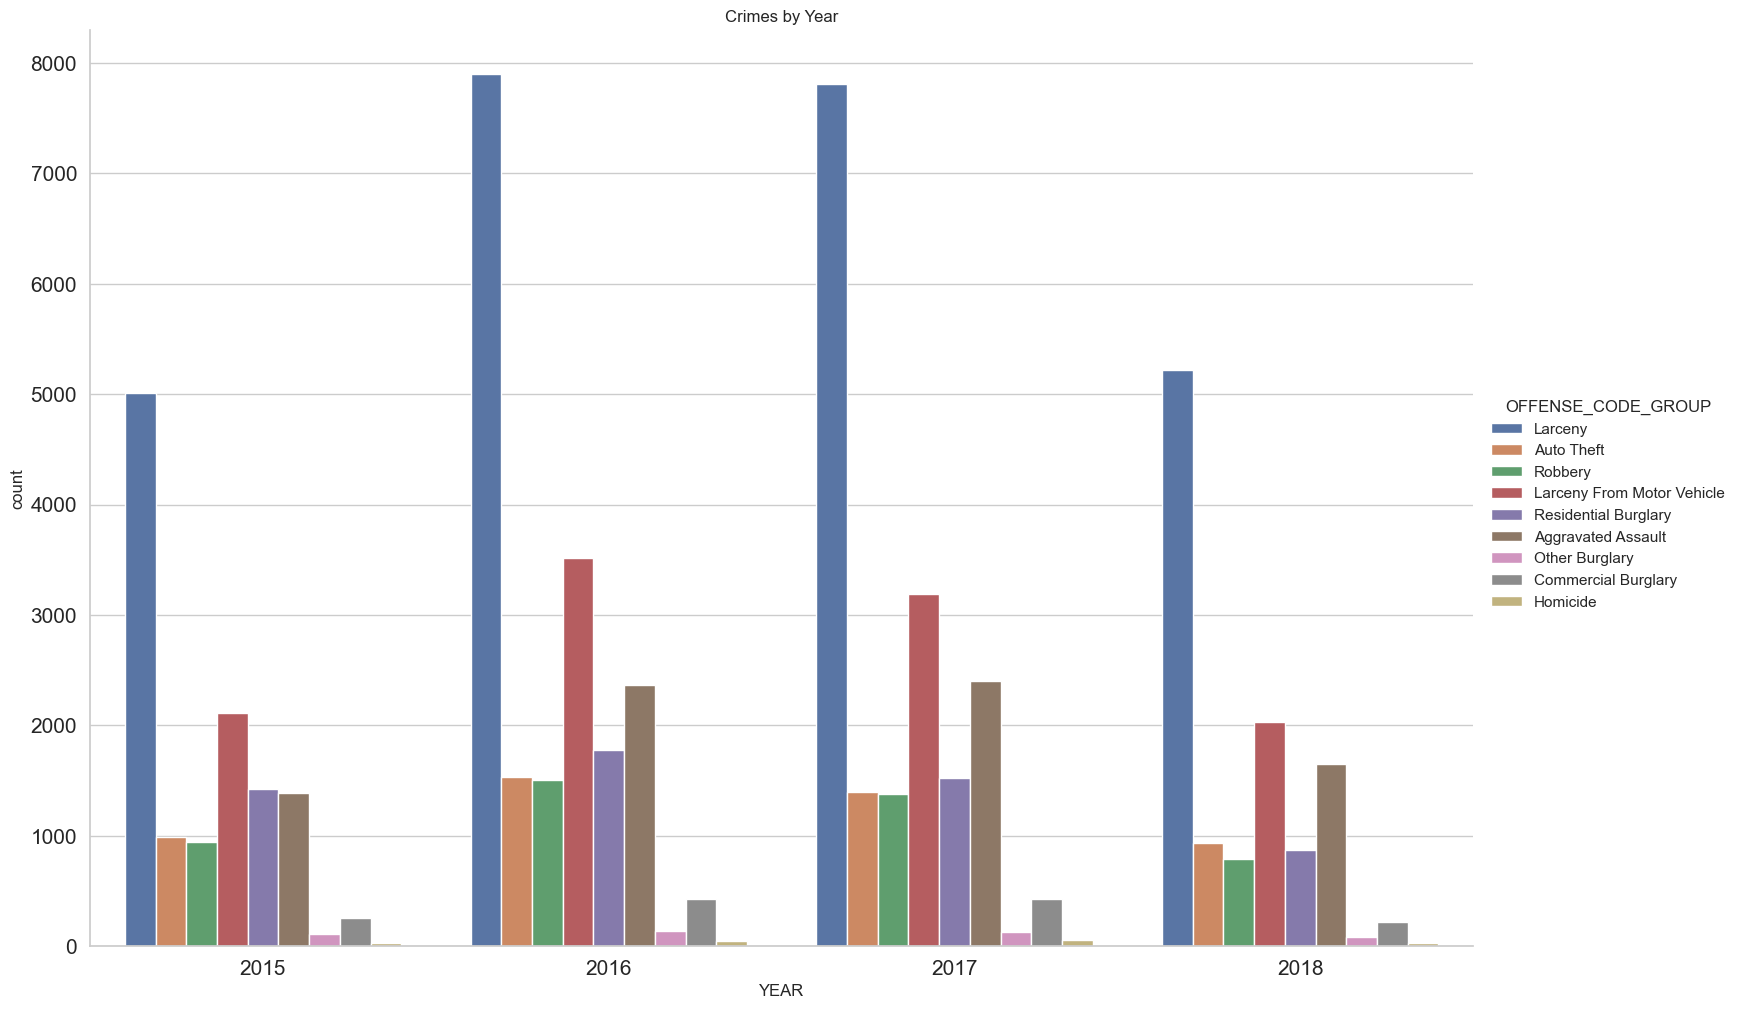

In [1257]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pyproj as pyp
crime_set = pd.read_csv("crime.csv", encoding='ISO-8859–1')
crime_sets=  crime_set.drop(crime_set[(crime_set['YEAR'] == 2015) | (crime_set['YEAR'] == 2018)].index)
street_lights = pd.read_csv("streetlight locations.csv")
boston_weather = pd.read_csv("Boston Weather Cleaned.csv")
booze_sales =pd.read_csv("booze.csv")
state_plane = pyp.Proj(init='epsg:2249')
wgs84 = pyp.Proj(init='epsg:4326')
latitudes, longitudes = pyp.transform(state_plane, wgs84, booze_sales['GPSX'].values, booze_sales['GPSY'].values)
booze_sales['Latitude'] = latitudes
booze_sales['Longitude'] = longitudes
boston_booze = booze_sales.drop(columns=['license_num','city', 'historicallicensenum','status','license_category','license_type','issued','expires','business_name','comments','location_comments','opening','closing','patronsout','capacity','applicant','manager','day_phone','evening_phone','address','state','state','zip','GPSX','GPSY'])
crime_set['OCCURRED_ON_DATE'] = pd.to_datetime(crime_set['OCCURRED_ON_DATE'])
crime_set['Date'] = crime_set['OCCURRED_ON_DATE'].dt.date
crime_set['Day_of_YEAR']= crime_set["OCCURRED_ON_DATE"].dt.dayofyear
crime_sets['Day_of_YEAR']= crime_set["OCCURRED_ON_DATE"].dt.dayofyear
crime_set['SHOOTING'].fillna('N',inplace=True)
crime_set['Lat'].fillna('NaN',inplace=True)
crime_set['Long'].fillna('NaN',inplace=True)
crime_set['Lat'].replace(-1, None, inplace=True)
crime_set['Long'].replace(-1, None, inplace=True)

complete_df = joined_data.set_index('Date')
updated_crime_df = complete_df.join(events, how = 'left')
complete_dfs = updated_crime_df.join(weather,how = 'left')
complete_dfs = complete_dfs.reset_index()
complete_dfs = complete_dfs.drop(columns = ['Year','Location','OFFENSE_DESCRIPTION','Month','REPORTING_AREA','OFFENSE_CODE',])
complete_dfs['event'].fillna('N', inplace=True)
complete_dfs = complete_dfs.rename(columns={'index': 'Date'})
complete_dfs['Lat'].replace(-1, np.nan, inplace=True)
complete_dfs['Long'].replace(-1, np.nan, inplace=True)
complete_dfs['Lat'].fillna('NaN',inplace=True)
complete_dfs['Long'].fillna('NaN',inplace=True)
complete_dfs.dropna(subset=['Long', 'Lat'])
census_gdf = gpd.read_file('Boston_Neighborhood_Boundaries_approximated_by_2020_Census_Block_Groups.shp')
input_epsg = 'epsg:2249'
output_epsg = 'epsg:4326'
census_gdf = census_gdf.to_crs(output_epsg)
census_gdf['b_p'] = census_gdf['black_all'] / census_gdf['tot_pop_al']
census_gdf['co_p'] = census_gdf['college'] / census_gdf['tot_pop_al']
census_gdf['his_p'] = census_gdf['hisp_all'] / census_gdf['tot_pop_al']
census_gdf['white_p'] = census_gdf['white_all'] / census_gdf['tot_pop_al']
census_gdf = census_gdf.dropna(subset=['b_p'])
census_gdf['point'] = census_gdf.representative_point()
census_points = census_gdf.copy()
census_points.set_geometry('point', inplace = True)
def add_label():
    for x, y, label in zip(census_points.geometry.x,census_points.geometry.y,census_points['blockgr202']):plt.text(x,y,label,fontsize =5,fontweight = 'bold')

part_one_crimes = crime_set.loc[crime_set['UCR_PART'] == 'Part One']
part_1_crimes = crime_sets.loc[crime_sets['UCR_PART'] == 'Part One']
part_two_crimes = crime_set.loc[crime_set['UCR_PART'] == 'Part Two']
print((part_one_crimes['OFFENSE_CODE_GROUP'].value_counts(normalize=True).iloc[:10])*100)
print((part_one_crimes['YEAR'].value_counts(normalize=True))*100)


sns.catplot(x='YEAR',kind='count',hue='OFFENSE_CODE_GROUP',height=10,aspect=1.5, data = part_one_crimes)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Crimes by Year")
plt.show()


The most frequent Type 1 crime commmited in Boston between 2015 and 2018 is Larceny (~42%), whie Homicide represents the smallest proportion at 0.26%. The data also illustrates a ~1.4% drop in Type 1 crimes from 2016 to 2017. 

**The Crime dataset analyzed started in May of 2015 and ended September 2018; which explains the decrease of crime for those years.**

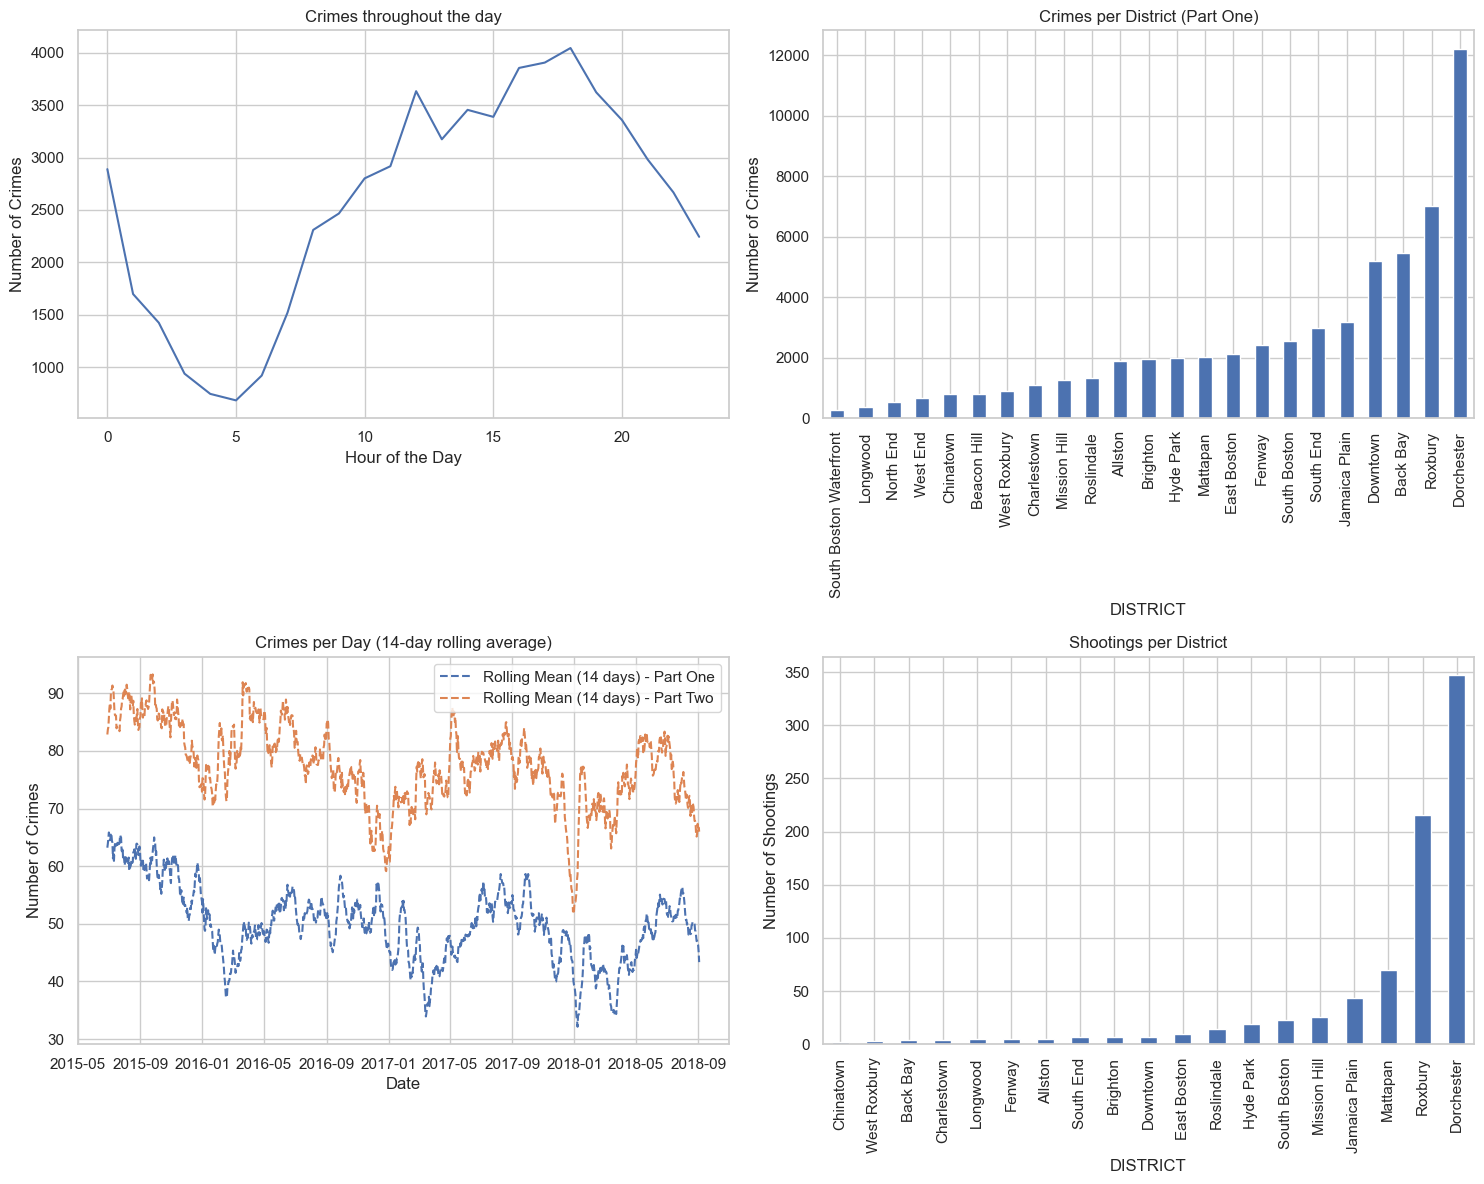

In [1258]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
part_one_crimes.groupby("HOUR").size().plot(kind="line")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.title("Crimes throughout the day")

plt.subplot(2, 2, 2)
block_dfs.groupby("blockgr202").size().sort_values(ascending=True).plot(kind="bar")
plt.xlabel("DISTRICT")
plt.ylabel("Number of Crimes")
plt.title("Crimes per District (Part One)")

plt.subplot(2, 2, 3)
complete_dfs.drop(complete_dfs[complete_dfs['UCR_PART'] == 'Other'].index, inplace=True)
complete_dfs.drop(complete_dfs[complete_dfs['UCR_PART'] == 'Part Three'].index, inplace=True)
complete_dfs['Date'] = pd.to_datetime(complete_dfs['Date'])
grouped_data = complete_dfs.groupby(['Date', 'UCR_PART']).size().reset_index(name='Number_of_Crimes')
pivot_data = grouped_data.pivot(index='Date', columns='UCR_PART', values='Number_of_Crimes').fillna(0)
rolling_mean_data = pivot_data.rolling(window=14).mean()

for ucr_part in rolling_mean_data.columns:
    plt.plot(rolling_mean_data.index, rolling_mean_data[ucr_part], label=f'Rolling Mean (14 days) - {ucr_part}', linestyle='--')

plt.title('Crimes per Day (14-day rolling average)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()

plt.subplot(2, 2, 4)
complete_dfs.loc[complete_dfs['SHOOTING'] == 'Y'].groupby("blockgr202").size().sort_values(ascending=True).plot(kind="bar")
plt.xlabel("DISTRICT")
plt.ylabel("Number of Shootings")
plt.title("Shootings per District")

plt.tight_layout()
plt.show()

In Boston, crime rates reach their peak daily at 6:00 pm, gradually subsiding to their lowest levels by 5:00 am. Dorchester consistently experiences the highest incidence of Type One Crimes, with Roxbury ranking second in frequency. This pattern holds true for incidents of shootings, where Dorchester also records the highest number, followed by Roxbury in second place.Examining the 14-day rolling average, there is a discernible downward trend in both Type 1 and Type 2 crimes over the specified time span. Notably, the patterns for both crime types closely mirror each other, with declines during the winter months and peaks observed during the summer. 

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\2959789312.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = complete_dfs.groupby('UCR_PART').resample('M', on='OCCURRED_ON_DATE').sum()
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\2959789312.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = complete_dfs.groupby('UCR_PART').resample('M', on='OCCURRED_ON_DATE').sum()


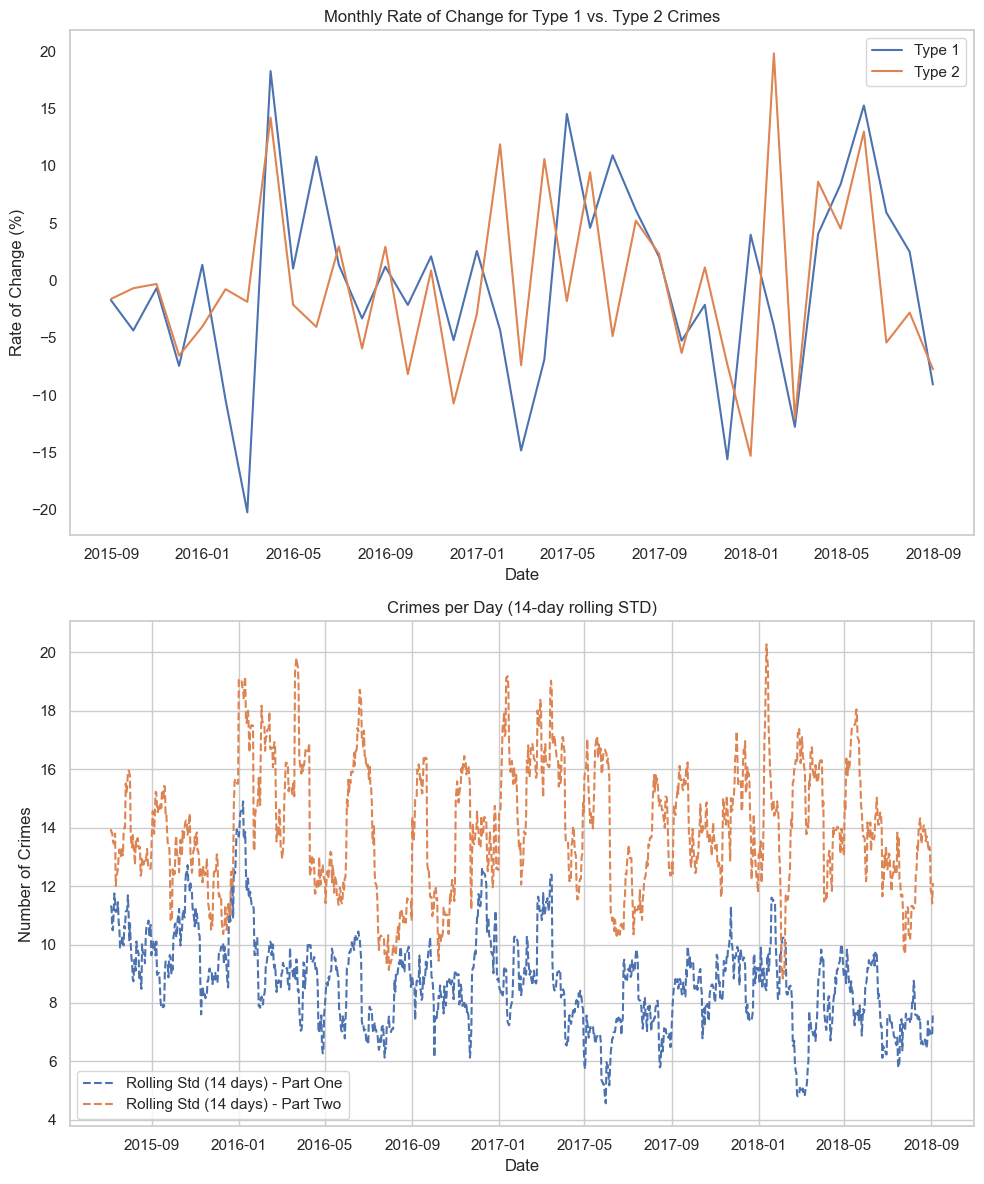

In [1290]:
complete_dfs['Count'] = complete_dfs.groupby('UCR_PART')['UCR_PART'].transform('count')
monthly_data = complete_dfs.groupby('UCR_PART').resample('M', on='OCCURRED_ON_DATE').sum()
monthly_data['Rate of Change'] = monthly_data['Count'].pct_change() * 100
part_one_crimes = monthly_data.loc['Part One'][2:-1]
part_two_crimes = monthly_data.loc['Part Two'][2:-1]
complete_dfs.drop(complete_dfs[complete_dfs['UCR_PART'] == 'Other'].index, inplace=True)
complete_dfs.drop(complete_dfs[complete_dfs['UCR_PART'] == 'Part Three'].index, inplace=True)
complete_dfs['Date'] = pd.to_datetime(complete_dfs['Date'])
grouped_data = complete_dfs.groupby(['Date', 'UCR_PART']).size().reset_index(name='Number_of_Crimes')
pivot_data = grouped_data.pivot(index='Date', columns='UCR_PART', values='Number_of_Crimes').fillna(0)
rolling_std_data = pivot_data.rolling(window=21).std()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

axes[0].plot(part_one_crimes.index.get_level_values('OCCURRED_ON_DATE'), part_one_crimes['Rate of Change'], label='Type 1')
axes[0].plot(part_two_crimes.index.get_level_values('OCCURRED_ON_DATE'), part_two_crimes['Rate of Change'], label='Type 2')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Rate of Change (%)')
axes[0].set_title('Monthly Rate of Change for Type 1 vs. Type 2 Crimes')
axes[0].legend()
axes[0].grid()

for ucr_part in rolling_std_data.columns:
    axes[1].plot(rolling_std_data.index, rolling_std_data[ucr_part], label=f'Rolling Std (14 days) - {ucr_part}', linestyle='--')
axes[1].set_title('Crimes per Day (14-day rolling STD)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Crimes')
axes[1].legend()


plt.tight_layout()
plt.show()

When analyzing the monthly rate of change for Type 1 and Type 2 crimes, the most substantial shift occurs during the transition from winter to spring, with both types experiencing a noteworthy change of approximately ~20%. A parallel pattern emerges when scrutinizing the crime rate through the lens of rolling standard deviation. Notably, Part 2 crimes exhibit a greater variation at this time scale.

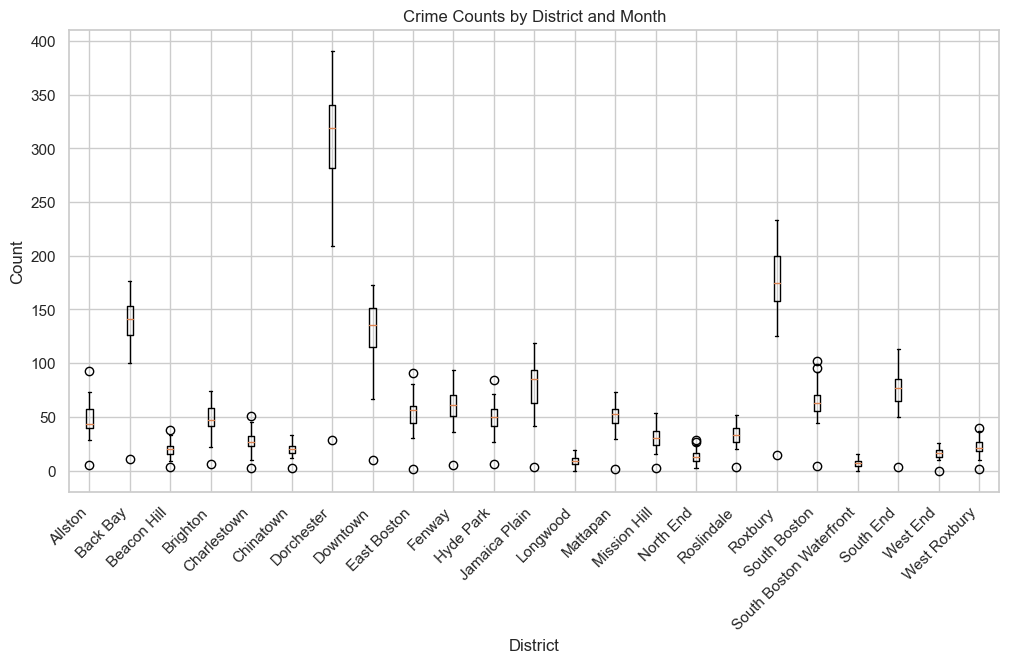

In [1291]:
complete_dfsd = complete_dfs[complete_dfs['UCR_PART'] == 'Part One']
district_monthly_counts = complete_dfsd.groupby(['blockgr202', complete_dfsd['OCCURRED_ON_DATE'].dt.to_period('M')]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
positions = range(1, len(district_monthly_counts) + 1)
for position, (district, counts) in zip(positions, district_monthly_counts.iterrows()):
    plt.boxplot(counts, positions=[position], showfliers=True, labels=[district])
plt.xticks(positions, district_monthly_counts.index, rotation=45, ha='right')
plt.title('Crime Counts by District and Month')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

Dorchester consistently exhibits the highest monthly variation in crime among districts, followed by Roxbury and Downtown. It's noteworthy that all districts, without exception, feature at least one outlier month in terms of crime statistics.

In [2]:
!pip install geopandas

In [3]:
!pip install pysal

In [4]:
!pip install contextily 
import contextily as ctx 

In [5]:
!pip install folium 
import folium 
from folium.plugins import HeatMap

In [6]:
!pip install pointpats
from pointpats import (
distance_statistics, 
QStatistic,
random,
PointPattern)

In [7]:
!pip install libpysal

In [176]:
pip install astral

     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     -------- ------------------------------ 71.7/341.8 kB 2.0 MB/s eta 0:00:01
     ------------------- ------------------ 174.1/341.8 kB 2.1 MB/s eta 0:00:01
     ------------------------------- ------ 286.7/341.8 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 341.8/341.8 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [182]:
from astral.sun import sun
from astral import LocationInfo
from dateutil import tz

In [1268]:
def is_night(latitude, longitude, date):
    location = LocationInfo(latitude, longitude)
    s = sun(location.observer, date=date)
    date_aware = date.replace(tzinfo=tz.gettz("America/New_York"))

    return date_aware < s["sunrise"] or date_aware > s["sunset"]

crime_set['OCCURRED_ON_DATE'] = pd.to_datetime(crime_set['OCCURRED_ON_DATE'])
crime_set['is_night'] = crime_set.apply(lambda row: is_night(row['Lat'], row['Long'], row['OCCURRED_ON_DATE']), axis=1)

In [998]:
crime_set['Lat'].replace(-1, np.nan, inplace=True)
crime_set['Long'].replace(-1, np.nan, inplace=True)
crime_set['Lat'].fillna('NaN',inplace=True)
crime_set['Long'].fillna('NaN',inplace=True)
crime_set.dropna(subset=['Long', 'Lat'])
geometry = [Point(xy) for xy in zip(crime_set['Long'],crime_set['Lat'])]
crime_set_gdf= gpd.GeoDataFrame(crime_set,geometry=geometry, crs='4326')
joined_data = gpd.sjoin(crime_set_gdf, census_gdf, how='left', op='within')

C:\Users\camde\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [860]:
b_hospitals = pd.read_csv("boston_hospitals.csv", encoding='ISO-8859–1')
geometry = [Point(xy) for xy in zip(b_hospitals['Long'], b_hospitals['Lat'])]
b_hospitals_gdf = gpd.GeoDataFrame(b_hospitals, geometry=geometry, crs='EPSG:4326')

In [1182]:
b_stadiums = pd.read_csv("stadiums.csv", encoding='ISO-8859–1')
geometry = [Point(xy) for xy in zip(b_stadiums['Lat'], b_stadiums['Long'])]
b_stadiums_gdf = gpd.GeoDataFrame(b_stadiums, geometry=geometry, crs='EPSG:4326')

In [1191]:
census_gdf = gpd.read_file('Boston_Neighborhood_Boundaries_approximated_by_2020_Census_Block_Groups.shp')
input_epsg = 'epsg:2249'
output_epsg = 'epsg:4326'
census_gdf = census_gdf.to_crs(output_epsg)
census_gdf['b_p'] = census_gdf['black_all'] / census_gdf['tot_pop_al']
census_gdf['co_p'] = census_gdf['college'] / census_gdf['tot_pop_al']
census_gdf['his_p'] = census_gdf['hisp_all'] / census_gdf['tot_pop_al']
census_gdf['white_p'] = census_gdf['white_all'] / census_gdf['tot_pop_al']
census_gdf = census_gdf.dropna(subset=['b_p'])
census_gdf['point'] = census_gdf.representative_point()
census_points = census_gdf.copy()
census_points.set_geometry('point', inplace = True)
def add_label():
    for x, y, label in zip(census_points.geometry.x,census_points.geometry.y,census_points['blockgr202']):plt.text(x,y,label,fontsize =5,fontweight = 'bold')

In [999]:
joined_data['latitude'] = joined_data['geometry'].apply(lambda point: point.x if not point.is_empty else None)
joined_data['longitude'] = joined_data['geometry'].apply(lambda point: point.y if not point.is_empty else None)
joined_data = joined_data.dropna(subset=['latitude', 'longitude'])
def find_closest_police_station(row):
    user_location = (row['latitude'], row['longitude'])
    distances = BPS_set.apply(lambda x: geodesic((x['CENTROIDX'], x['CENTROIDY']), user_location).miles, axis=1)
    closest_station_index = distances.idxmin()
    closest_station = BPS_set.loc[closest_station_index]
    closest_station_name = closest_station['NAME']
    distance_to_station = geodesic((closest_station['CENTROIDX'], closest_station['CENTROIDY']), user_location).miles
    return closest_station_name, distance_to_station
joined_data[['closest_police_station', 'distance_to_station']] = joined_data.apply(find_closest_police_station, axis=1, result_type='expand')


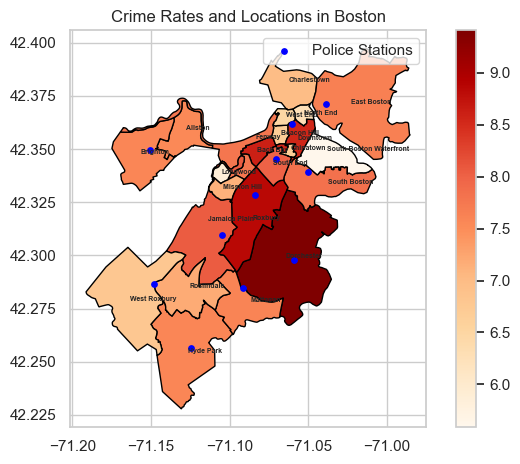

In [1245]:
district_counts = pd.DataFrame({'Count':complete_dfsd.blockgr202.value_counts().sort_values(ascending = False)})
census_gdf['CRIMES'] = census_gdf.blockgr202.map(district_counts['Count'])
b_colleges = pd.read_csv("Boston_colleges.csv", encoding='ISO-8859–1')
geometry = [Point(xy) for xy in zip(b_colleges['Latitude'], b_colleges['Longitude'])]
b_colleges_gdf = gpd.GeoDataFrame(b_colleges, geometry=geometry, crs='EPSG:4326')
census_gdf['CRIMES_log'] = np.log1p(census_gdf['CRIMES']) 
ax = census_gdf.plot(column='CRIMES_log', cmap='OrRd', legend=True, edgecolor='black')
points_gdf.plot(ax=ax, color='blue', markersize=15, label='Police Stations')
ax.legend()
ax.set_title('Crime Rates and Locations in Boston')
plt.tight_layout()
add_label()
plt.show()

The visual representation above provides insight into the distribution of crime across Boston on a logarithmic scale, incorporating the locations of police stations and broken down by town-district. Notably, Dorchester stands out with the highest crime rate, however, it also has the largest area. This observation gains significance when considering the relatively sparse presence of nearby police stations in that district, and only one within.

Text(0.5, 1.0, 'Boston Police Districts')

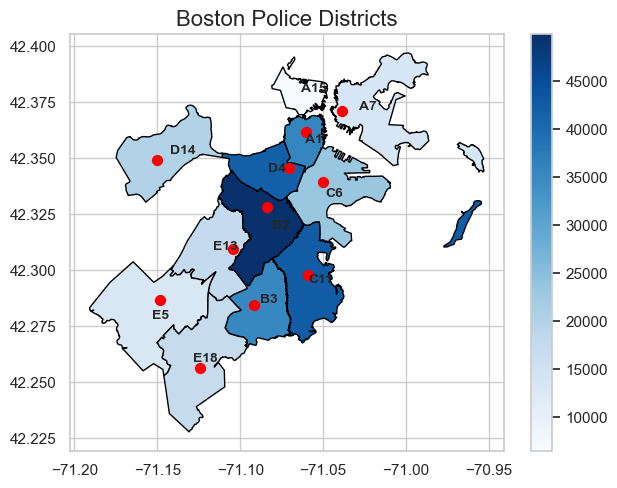

In [1294]:
import geopandas as gpd
districts_gdf = gpd.read_file('Police_Districts.shp')
district_counts = pd.DataFrame({'Count':crime_set.DISTRICT.value_counts().sort_values(ascending = False)})
districts_gdf['CRIMES'] = districts_gdf.DISTRICT.map(district_counts['Count'])
districts_gdf['point'] = districts_gdf.representative_point()
label_points = districts_gdf.copy()
bps_points = BPS_set_gdf.copy()
points_gdf = gpd.GeoDataFrame(bps_points, geometry='geometry')
label_points.set_geometry('point', inplace = True)
ax = districts_gdf.plot(column = districts_gdf.CRIMES, cmap = 'Blues', legend = True, edgecolor = 'black')
points_gdf.plot(ax=ax, color='red', markersize=50, label='Police Stations')
def add_label():
    for x, y, label in zip(label_points.geometry.x,label_points.geometry.y,label_points['DISTRICT']):plt.text(x,y,label,fontsize =10,fontweight = 'bold')
add_label()
plt.tight_layout()
plt.title('Boston Police Districts',fontsize=16)


The provided graphic visually represents police district boundaries, showcasing corresponding crime rates in each district and indicating the locations of police stations. It's worth noting that Dorchester spans three police districts—C6, C1, and B3. Additionally, while B2 may not appear as crime-heavy when viewed on a town-district level, it's essential to recognize that this police district oversees multiple town-districts.

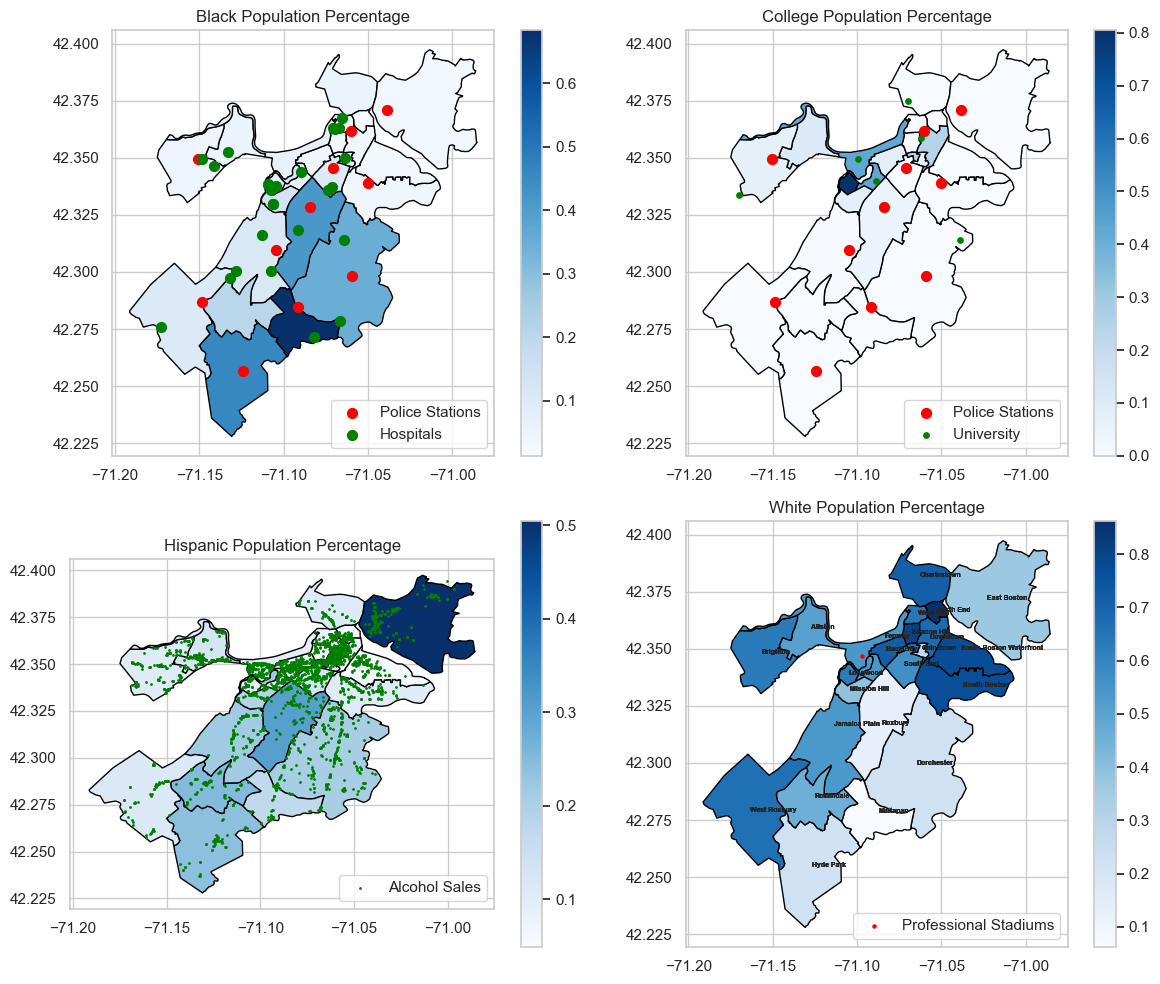

In [1246]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

ax = census_gdf.plot(column='b_p', cmap='Blues', legend=True, edgecolor='black', ax=axs[0, 0])
points_gdf.plot(ax=ax, color='red', markersize=50, label='Police Stations')
b_hospitals_gdf.plot(ax=ax, color='green', markersize=50, label='Hospitals')
add_label()
ax.legend(loc='lower right')
ax.set_title('Fig.1: Black Population Percentage')

ax = census_gdf.plot(column='co_p', cmap='Blues', legend=True, edgecolor='black', ax=axs[0, 1])
points_gdf.plot(ax=ax, color='red', markersize=50, label='Police Stations')
b_colleges_gdf.plot(ax=ax, color='green', markersize=15, label='University ')
add_label()
ax.legend(loc='lower right')
ax.set_title('Fig.2: College Population Percentage')

ax = census_gdf.plot(column='his_p', cmap='Blues', legend=True, edgecolor='black', ax=axs[1, 0])
boston_booze_gdf.plot(ax=ax, color='green', markersize=1, label='Alcohol Sales')
add_label()
ax.legend(loc='lower right')
ax.set_title('Fig.3: Hispanic Population Percentage')

ax = census_gdf.plot(column='white_p', cmap='Blues', legend=True, edgecolor='black', ax=axs[1, 1])
b_stadiums_gdf.plot(ax=ax, color='red', markersize=5, label='Professional Stadiums')
add_label()
ax.legend(loc='lower right')
ax.set_title('Fig.4: White Population Percentage')

plt.tight_layout()

plt.show()

Figure 1 displays the distribution of African Americans in Boston, juxtaposed with the locations of Boston hospitals. Notably, the majority of hospitals are not in close proximity to predominantly African American populations. Additionally, the town-districts with the highest crime rates align with areas of dense African American communities. Further research is imperative to compare ticketing rates per stop in these specific areas against other town-districts, aiming to ascertain the presence of any potential biases.

Figure 2 illustrates the distribution of college students in Boston, featuring the locations of the Top 6-enrolled universities. Notably, Northeastern, one of the prominent universities, is situated in Dorchester.

Figure 3 & 4 illustrate the distribution of Hispanics and Caucasians in Boston, along with the location of Alcohol Sales and Sports Stadiums (Fenway Park & TD Garden). 

In [307]:
from geopy.distance import geodesic

In [1274]:
holidays = pd.DataFrame({"OCCURRED_ON_DATE":
                    ['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-31', # Halloween 
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25', # Christmas
                     '2015-01-01', # New Years Day
                     '2015-01-19', # MLK Day
                     '2015-03-17', # St. Patrick's Day
                     '2015-04-20', # Boston marathon
                     '2015-05-25', # Memorial Day
                     '2015-07-04', # Independence Day
                     '2015-09-07', # Labor Day
                     '2015-10-31', # Halloween 
                     '2015-11-11', # Veterans Day
                     '2015-11-26', # Thanksgiving
                     '2015-12-25', # Christmas
                     '2016-01-01', # New Years Day
                     '2016-01-18', # MLK Day
                     '2016-03-17', # St. Patrick's Day
                     '2016-04-18', # Boston marathon
                     '2016-05-30', # Memorial Day
                     '2016-07-04', # Independence Day
                     '2016-09-05', # Labor Day
                     '2016-10-31', # Halloween
                     '2016-11-11', # Veterans Day
                     '2016-11-24', # Thanksgiving
                     '2016-12-25', # Christmas
                     '2018-01-01', # New Years Day
                     '2018-01-15', # MLK Day
                     '2018-03-17', # St. Patrick's Day
                     '2018-04-16', # Boston marathon
                     '2018-05-28', # Memorial Day
                     '2018-07-04', # Independence Day
                     '2018-09-03', # Labor Day
                     '2018-10-31', # Halloween
                     '2018-11-12', # Veterans Day
                     '2018-11-22', # Thanksgiving
                     '2018-12-25'],# Christmas
                "event":['New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',]})
patriots_games = pd.read_csv("new england patriots games.csv")
event = pd.concat([holidays,patriots_games])

In [1275]:
event['OCCURRED_ON_DATE'] = pd.to_datetime(event['OCCURRED_ON_DATE'])
boston_weather['Date'] = pd.to_datetime(boston_weather['Date'])
events =event.set_index('OCCURRED_ON_DATE')
weather = boston_weather.set_index('Date')

In [1276]:
complete_df = joined_data.set_index('Date')
updated_crime_df = complete_df.join(events, how = 'left')
complete_dfs = updated_crime_df.join(weather,how = 'left')
complete_dfs = complete_dfs.reset_index()
complete_dfs = complete_dfs.drop(columns = ['Year','Location','OFFENSE_DESCRIPTION','Month','REPORTING_AREA','OFFENSE_CODE',])
complete_dfs['event'].fillna('N', inplace=True)
complete_dfs = complete_dfs.rename(columns={'index': 'Date'})
complete_dfs['Lat'].replace(-1, np.nan, inplace=True)
complete_dfs['Long'].replace(-1, np.nan, inplace=True)
complete_dfs['Lat'].fillna('NaN',inplace=True)
complete_dfs['Long'].fillna('NaN',inplace=True)
complete_dfs.dropna(subset=['Long', 'Lat'])

Date INCIDENT_NUMBER               OFFENSE_CODE_GROUP DISTRICT  \
0      2015-06-15      I172040657                       Harassment      C11   
1      2015-06-15      I162055778                            Fraud       D4   
2      2015-06-15      I162013546                    Property Lost       B3   
3      2015-06-15      I152085794                    Property Lost      C11   
4      2015-06-15      I152067251                            Fraud       A1   
...           ...             ...                              ...      ...   
298324 2018-09-03      I182070719                            Towed      E13   
298325 2018-09-03      I182070718                   Simple Assault      NaN   
298326 2018-09-03      I182070716  Motor Vehicle Accident Response       A7   
298327 2018-09-03      I182070715             Investigate Property       D4   
298328 2018-09-03      I182070708                   Simple Assault       D4   

       SHOOTING    OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  ...  \
0             N 2015-06-15 00:00:00  2015      6      Monday     0  ...   
1             N 2015-06-15 09:00:00  2015      6      Monday     9  ...   
2             N 2015-06-15 00:00:00  2015      6      Monday     0  ...   
3             N 2015-06-15 16:00:00  2015      6      Monday    16  ...   
4             N 2015-06-15 00:00:00  2015      6      Monday     0  ...   
...         ...                 ...   ...    ...         ...   ...  ...   
298324        N 2018-09-03 00:51:00  2018      9      Monday     0  ...   
298325        N 2018-09-03 01:02:00  2018      9      Monday     1  ...   
298326        N 2018-09-03 00:40:00  2018      9      Monday     0  ...   
298327        N 2018-09-03 01:19:00  2018      9      Monday     1  ...   
298328        N 2018-09-03 00:17:00  2018      9      Monday     0  ...   

         latitude  longitude        closest_police_station  \
0      -71.065945  42.291093  District C-11 Police Station   
1      -71.073747  42.342830           District D-4 Police   
2      -71.082813  42.283634   District B-3 Police Station   
3      -71.068455  42.290372  District C-11 Police Station   
4      -71.056208  42.360205   District A-1 Police Station   
...           ...        ...                           ...   
298324 -71.103585  42.289291  District E-13 Police Station   
298325 -71.081143  42.338933   District B-2 Police Station   
298326 -71.039249  42.368659   District A-7 Police Station   
298327 -71.074724  42.339538           District D-4 Police   
298328 -71.072396  42.341077           District D-4 Police   

       distance_to_station      event   Day  Avg Temp  Avg Wind  Snowfall  \
0                 0.493552          N  15.0      59.0       9.0       0.0   
1                 0.220233          N  15.0      59.0       9.0       0.0   
2                 0.616586          N  15.0      59.0       9.0       0.0   
3                 0.664800          N  15.0      59.0       9.0       0.0   
4                 0.285952          N  15.0      59.0       9.0       0.0   
...                    ...        ...   ...       ...       ...       ...   
298324            0.463925  Labor Day   NaN       NaN       NaN       NaN   
298325            0.315001  Labor Day   NaN       NaN       NaN       NaN   
298326            0.071076  Labor Day   NaN       NaN       NaN       NaN   
298327            0.310573  Labor Day   NaN       NaN       NaN       NaN   
298328            0.155506  Labor Day   NaN       NaN       NaN       NaN   

        Precip  
0          0.4  
1          0.4  
2          0.4  
3          0.4  
4          0.4  
...        ...  
298324     NaN  
298325     NaN  
298326     NaN  
298327     NaN  
298328     NaN  

[298329 rows x 67 columns]

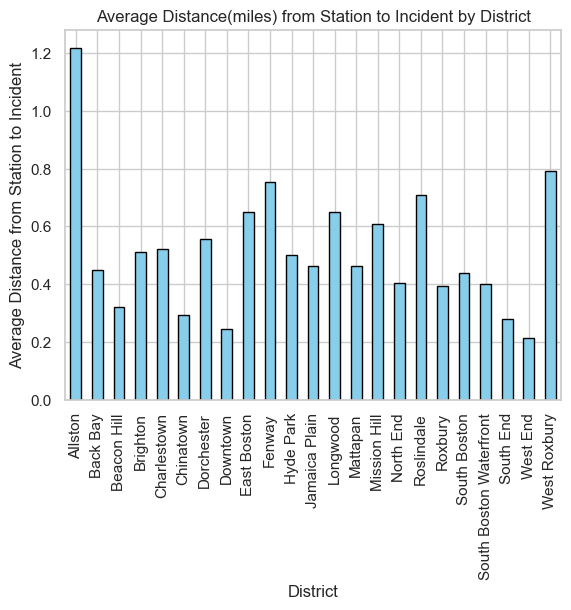

In [1277]:
average_distances = complete_dfs.groupby('blockgr202')['distance_to_station'].mean()
average_distances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('District')
plt.ylabel('Average Distance from Station to Incident')
plt.title('Average Distance(miles) from Station to Incident by District')
plt.show()

Fenway, Allston, and West Roxbury exhibit a notable distance between reported crimes and the nearest police station. This correlation can be attributed to the absence of police stations within these town-districts. Consequently, it is imperative to ensure the presence of additional police units in these areas to facilitate timely backup and enhance public safety.

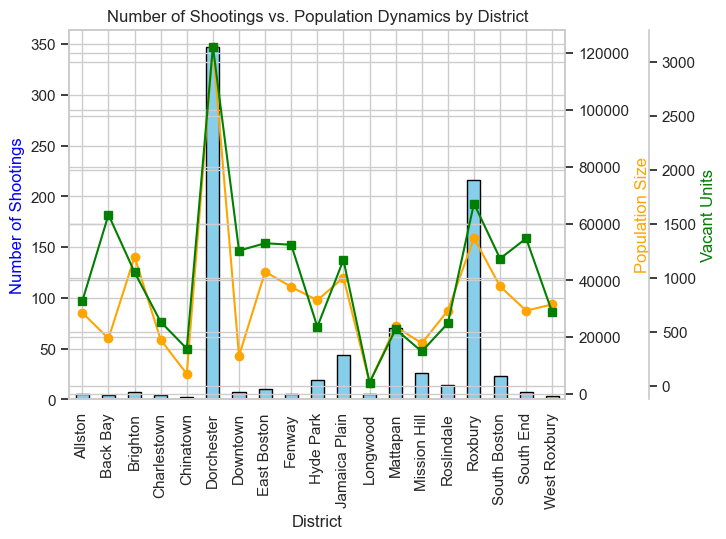

In [1295]:
complete_shooting = complete_dfs[complete_dfs['SHOOTING'] == 'Y']
count_by_blockgr202 = complete_shooting.groupby('blockgr202').size()
average_total_pop = complete_shooting.groupby('blockgr202')['tot_pop_al'].mean()
average_vacant_unit = complete_shooting.groupby('blockgr202')['vacant_uni'].mean()
fig, ax1 = plt.subplots()
count_by_blockgr202.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_xlabel('District')
ax1.set_ylabel('Number of Shootings', color='blue')
ax1.set_title('Number of Shootings vs. Population Dynamics by District')
ax2 = ax1.twinx()
average_total_pop.plot(kind='line', color='orange', marker='o', ax=ax2)
ax2.set_ylabel( 'Population Size', color='orange')
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third axis
average_vacant_unit.plot(kind='line', color='green', marker='s', ax=ax3)
ax3.set_ylabel('Vacant Units', color='green')
plt.show()


While Dorchester and Roxbury stand out with the largest populations and higher incidence of shootings, other town-districts deviate from this pattern. This discrepancy underscores the need for further research to uncover the specific factors contributing to elevated shooting rates in these neighborhoods compared to their counterparts.

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\3254118811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\3254118811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)
C:\Users\camde\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

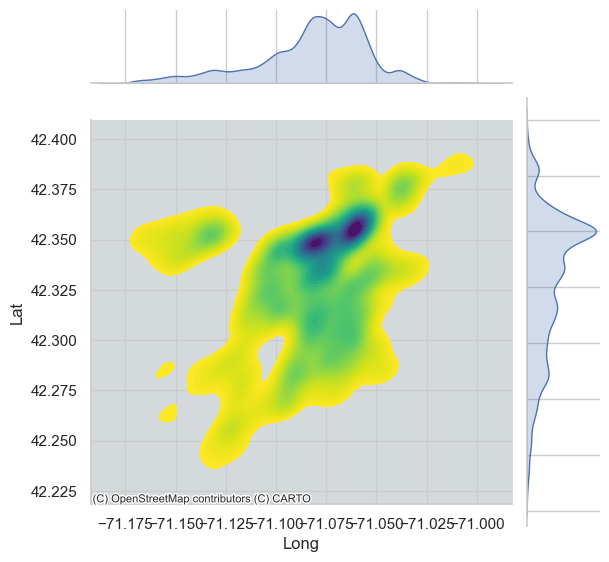

In [1279]:
poc_1 = complete_dfs.copy()
filtered_poc_1 = poc_1[poc_1['UCR_PART'] == 'Part One']
filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)
filtered_poc_1['Lat'] = filtered_poc_1['Lat'].astype(float)
filtered_poc_1['Long'] = filtered_poc_1['Long'].astype(float)
geometry = gpd.points_from_xy(filtered_poc_1['Long'], filtered_poc_1['Lat'])
filtered_poc_1 = gpd.GeoDataFrame(filtered_poc_1, geometry=geometry, crs="EPSG:4326")
filtered_poc_1 = filtered_poc_1.to_crs(epsg=3857)
joint_axes = sns.jointplot(x='Long', y='Lat', data=filtered_poc_1, kind='kde', cmap="viridis_r", fill=True, n_levels=50)
ax2=ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron, zoom=12)

Upon analyzing the heatmap of Type 1 crimes in Boston, it becomes evident that the peak occurrences are concentrated around the latitude of approximately ~42.360 and longitude of ~71.062. Additionally, a secondary peak is observed at coordinates ~42.350 and ~71.087.

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\1905656681.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\1905656681.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)


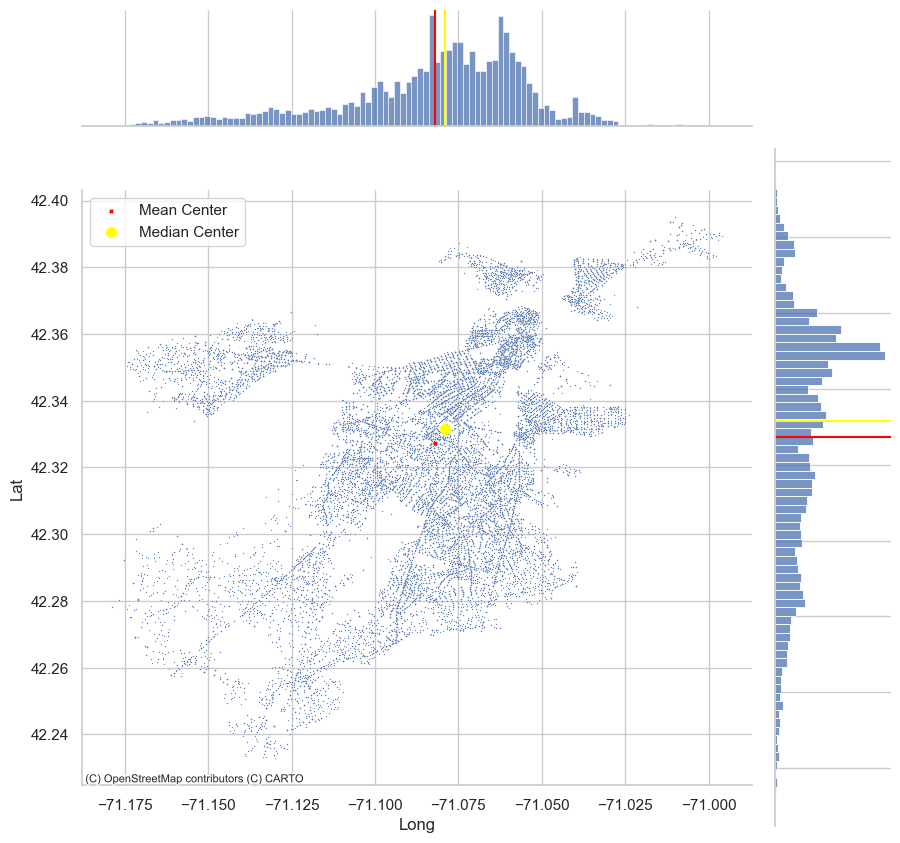

In [1280]:
from pointpats import centrography
poc_1 = complete_dfs.copy()
filtered_poc_1 = poc_1[poc_1['UCR_PART'] == 'Part One']
filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)
filtered_poc_1 = filtered_poc_1.dropna(subset=['Lat', 'Long'])
filtered_poc_1['Lat'] = pd.to_numeric(filtered_poc_1['Lat'], errors='coerce')
filtered_poc_1['Long'] = pd.to_numeric(filtered_poc_1['Long'], errors='coerce')
filtered_poc_1.dropna(subset=['Lat', 'Long'], inplace=True)
mean_center = centrography.mean_center(filtered_poc_1[['Long','Lat']])
med_center = centrography.euclidean_median(filtered_poc_1[['Long','Lat']])
joint_axes =sns.jointplot(x="Long",y="Lat",data=filtered_poc_1,s=0.75,height=9)
joint_axes.ax_joint.scatter(mean_center[0],mean_center[1],color="red",marker="x",s=5,label="Mean Center")
joint_axes.ax_marg_x.axvline(mean_center[0],color="red")
joint_axes.ax_marg_y.axhline(mean_center[1],color="red")
joint_axes.ax_joint.scatter(med_center[0],med_center[1],color="yellow",marker="o",s=50,label="Median Center")
joint_axes.ax_marg_x.axvline(med_center[0], color="yellow")
joint_axes.ax_marg_y.axhline(med_center[1], color="yellow")
joint_axes.ax_joint.legend()
ctx.add_basemap(joint_axes.ax_joint,crs="EPSG:3857",source=ctx.providers.CartoDB.Positron,zoom=1)
plt.show()

In [1283]:
print("The Mean of Crime is centered at:")
print(f'Longitude: {mean_center[0]}, Latitude: {mean_center[1]}')
print("The Median of Crime is centered at:")
print(f'Longitude: {med_center[0]}, Latitude: {med_center[1]}')

The Mean of Crime is centered at:
Longitude: -71.08213414901124, Latitude: 42.32737146981667
The Median of Crime is centered at:
Longitude: -71.07894938444095, Latitude: 42.33157986537702


In [1216]:
poc_1 = complete_dfs.copy()
filtered_poc_1 = poc_1[poc_1['UCR_PART'] == 'Part One']
filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)
filtered_poc_1['Lat'] = filtered_poc_1['Lat'].astype(float)
filtered_poc_1['Long'] = filtered_poc_1['Long'].astype(float)
filtered_poc_1 = filtered_poc_1.dropna(subset=['Lat', 'Long'])
m = folium.Map(location=[filtered_poc_1['Lat'].mean(), filtered_poc_1['Long'].mean()], zoom_start=12)
heat_data = [[point['Lat'], point['Long']] for index, point in filtered_poc_1.iterrows()]
HeatMap(heat_data).add_to(m)
m

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\4182508164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\4182508164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)
C:\Users\camde\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Explore the interactive heatmap to zoom in on street-level perspectives, offering a more comprehensive insight into the geographical constraints of crime in Boston.

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\220967086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\220967086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)


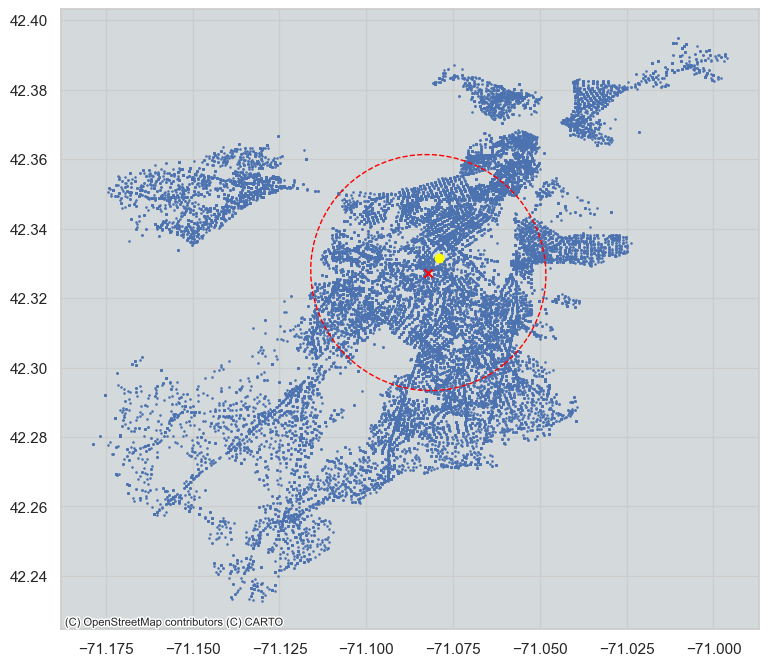

In [1284]:
from matplotlib.patches import Ellipse as ell
poc_1 = complete_dfs.copy()
filtered_poc_1 = poc_1[poc_1['UCR_PART'] == 'Part One']
filtered_poc_1['Lat'].replace(-1, np.nan, inplace=True)
filtered_poc_1['Long'].replace(-1, np.nan, inplace=True)
filtered_poc_1 = filtered_poc_1.dropna(subset=['Lat', 'Long'])
filtered_poc_1['Lat'] = pd.to_numeric(filtered_poc_1['Lat'], errors='coerce')
filtered_poc_1['Long'] = pd.to_numeric(filtered_poc_1['Long'], errors='coerce')
filtered_poc_1.dropna(subset=['Lat', 'Long'], inplace=True)
centrography.std_distance(filtered_poc_1[['Long','Lat']])
mean_center = centrography.mean_center(filtered_poc_1[['Long','Lat']])
med_center = centrography.euclidean_median(filtered_poc_1[['Long','Lat']])
major, minor, rotation = centrography.ellipse(filtered_poc_1[['Long','Lat']])
f,ax = plt.subplots(1,figsize=(9,9))
ax.scatter(filtered_poc_1['Long'],filtered_poc_1['Lat'],s=0.75)
ax.scatter(mean_center[0], mean_center[1], color="red", marker="x", label="Mean Center")
ax.scatter(med_center[0], med_center[1], color="yellow", marker="o", label="Median Center")
ellipse = ell(xy = mean_center ,width=major*2,height=minor*2,angle=np.rad2deg(rotation),facecolor="none",edgecolor="red",linestyle="--",label="Std. Ellipse")
ax.add_patch(ellipse)
ctx.add_basemap(ax,crs="EPSG:3857",source=ctx.providers.CartoDB.Positron, zoom=15)
plt.show()


The ellipse serves as a visual indicator, symbolizing the extent of one standard deviation from the central point of crime in Boston.

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\1409528230.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


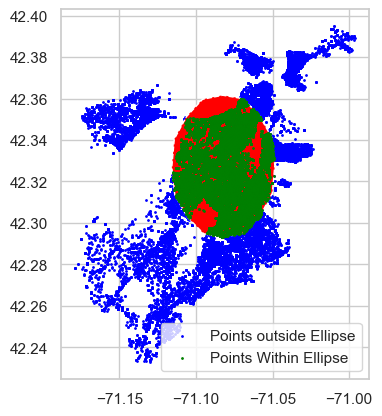

Crimes inside 1-Standard Deviation from the Center (mean): 32653 (55.43%)
Crimes outside 1-Standard Deviation from the Center (mean): 26259 (44.57%)


In [1285]:
from shapely.geometry import Point, Polygon
centrography.std_distance(filtered_poc_1[['Long','Lat']])
mean_center = centrography.mean_center(filtered_poc_1[['Long','Lat']])
med_center = centrography.euclidean_median(filtered_poc_1[['Long','Lat']])
major, minor, rotation = centrography.ellipse(filtered_poc_1[['Long','Lat']])
ellipse_patch = ell(xy=mean_center, width=major*2, height=minor*2, angle=rotation, facecolor="none", edgecolor="red", linestyle="--", label="Std. Ellipse")
ellipse_vertices = ellipse_patch.get_verts()
ellipse_polygon = Polygon(ellipse_vertices)
geometry = [Point(lon, lat) for lon, lat in zip(filtered_poc_1['Long'], filtered_poc_1['Lat'])]
gdf_points = gpd.GeoDataFrame(filtered_poc_1, geometry=geometry, crs='EPSG:4326')

points_within_ellipse = gdf_points[gdf_points.intersects(ellipse_polygon)]

fig, ax = plt.subplots()
gdf_points.plot(ax=ax, color='blue', label='Points outside Ellipse', markersize=1)
gpd.GeoSeries(ellipse_polygon).plot(ax=ax, color='red', linestyle='--', label='Ellipse')
points_within_ellipse.plot(ax=ax, color='green', label='Points Within Ellipse', markersize=1)
plt.legend()
plt.show()
num_points_inside = len(points_within_ellipse)
num_points_outside = len(gdf_points) - num_points_inside
total_points = len(gdf_points)
percentage_inside = (num_points_inside / total_points) * 100
percentage_outside = (num_points_outside / total_points) * 100

print(f"Crimes inside 1-Standard Deviation from the Center (mean): {num_points_inside} ({percentage_inside:.2f}%)")
print(f"Crimes outside 1-Standard Deviation from the Center (mean): {num_points_outside} ({percentage_outside:.2f}%)")

As depicted in the above graphic, approximately 55% of crime occurs within 1 standard deviation of the coordinates Longitude: -71.08213414901124, Latitude: 42.32737146981667. Hence, strategically concentrating the majority of police presence within this boundary would be advisable.

In [94]:
from sklearn.cluster import DBSCAN

In [831]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
param_grid = {
    'eps': np.arange(0.0001, 0.001, 0.0001),
    'min_samples': np.arange(100, 800, 50)
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    clusterer = DBSCAN(**params)
    clusterer.fit(coordinates_db[["Lat", "Long"]])
    unique_labels = np.unique(clusterer.labels_)
    if len(unique_labels) == 4:  # 4 includes the noise points as well
        silhouette_avg = silhouette_score(coordinates_db[["Lat", "Long"]], clusterer.labels_)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_params = params

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)

Best Silhouette Score: -0.3008462662597107
Best Parameters: {'eps': 0.0009000000000000001, 'min_samples': 550}


In [834]:
poc_1 = complete_dfs.copy()
poc_1 = poc_1[poc_1['UCR_PART'] == 'Part One']
poc_1['Lat'].replace(-1, np.nan, inplace=True)
poc_1['Long'].replace(-1, np.nan, inplace=True)
poc_1['Lat'].fillna('NaN',inplace=True)
poc_1['Long'].fillna('NaN',inplace=True)
poc_1['Lat'] = pd.to_numeric(poc_1['Lat'], errors='coerce')
poc_1['Long'] = pd.to_numeric(poc_1['Long'], errors='coerce')
poc_1.dropna(subset=['Lat', 'Long'], inplace=True)
coordinates_db = poc_1[['Lat', 'Long']].copy()
eps_value = 0.0009000000000000001
min_samples_value = 550
clusterer = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusterer.fit(coordinates_db[["Lat","Long"]])
c_labels = pd.Series(clusterer.labels_, index=coordinates_db.index)
noise = coordinates_db.loc[c_labels == -1, ["Long", "Lat"]]
crime_centers = pd.DataFrame(columns=['Cluster', 'Latitude', 'Longitude'])
for label in c_labels.unique():
    if label != -1:
        cluster_points = coordinates_db[c_labels == label]
        center_lat = cluster_points['Lat'].mean()
        center_long = cluster_points['Long'].mean()
        crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)

print(crime_centers)

   Cluster   Latitude  Longitude
0      2.0  42.347727 -71.078872
1      0.0  42.348683 -71.082805
2      1.0  42.355442 -71.060896


C:\Users\camde\AppData\Local\Temp\ipykernel_17120\467419481.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\467419481.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\467419481.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)


In [854]:
poc_1 = complete_dfs.copy()
poc_1 = poc_1[poc_1['UCR_PART'] == 'Part One']
poc_1['Lat'].replace(-1, np.nan, inplace=True)
poc_1['Long'].replace(-1, np.nan, inplace=True)
poc_1['Lat'].fillna('NaN',inplace=True)
poc_1['Long'].fillna('NaN',inplace=True)
poc_1['Lat'] = pd.to_numeric(poc_1['Lat'], errors='coerce')
poc_1['Long'] = pd.to_numeric(poc_1['Long'], errors='coerce')
poc_1.dropna(subset=['Lat', 'Long'], inplace=True)
coordinates_db = poc_1[['Lat', 'Long']].copy()
eps_value = 0.0009000000000000001
min_samples_value = 550
clusterer = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusterer.fit(coordinates_db[["Lat","Long"]])
c_labels = pd.Series(clusterer.labels_, index=coordinates_db.index)
noise = coordinates_db.loc[c_labels == -1, ["Long", "Lat"]]
crime_centers = pd.DataFrame(columns=['Cluster', 'Latitude', 'Longitude'])
for label in c_labels.unique():
    if label != -1:
        cluster_points = coordinates_db[c_labels == label]
        center_lat = cluster_points['Lat'].mean()
        center_long = cluster_points['Long'].mean()
        crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)

print(crime_centers)

   Cluster   Latitude  Longitude
0      2.0  42.347727 -71.078872
1      0.0  42.348683 -71.082805
2      1.0  42.355442 -71.060896


C:\Users\camde\AppData\Local\Temp\ipykernel_17120\467419481.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\467419481.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\467419481.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_centers = crime_centers.append({'Cluster': label, 'Latitude': center_lat, 'Longitude': center_long}, ignore_index=True)


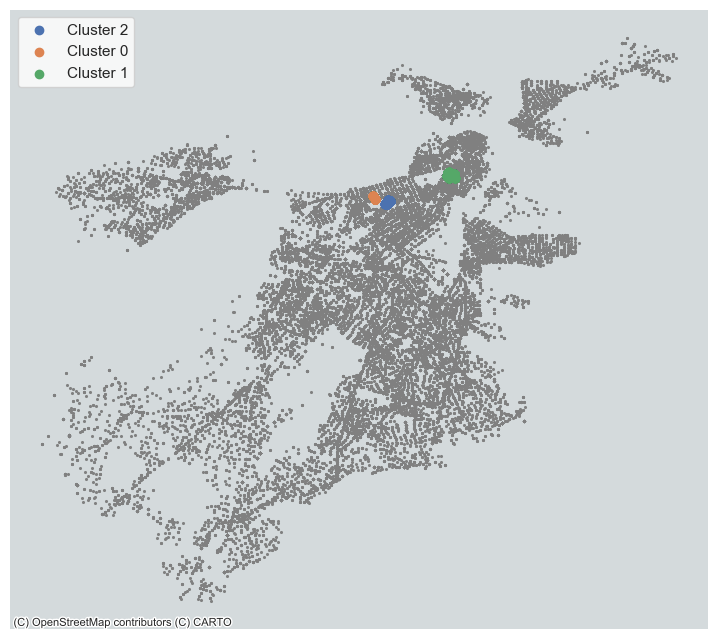

In [836]:
f, ax = plt.subplots(1, figsize=(9, 9))
ax.scatter(noise["Long"], noise["Lat"], c="grey", s=5, linewidth=0)
for label in c_labels.unique():
    if label != -1:
        cluster_points = coordinates_db[c_labels == label]
        ax.scatter(cluster_points["Long"], cluster_points["Lat"], label=f'Cluster {label}')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, zoom=12)
ax.set_axis_off()
plt.legend()
plt.show()

In [864]:
import pandas as pd
from geopy.geocoders import OpenCage

# Set up the geocoder with OpenCage API key
geolocator = OpenCage(api_key='f5d724f09fa544d09fd312ca9e7e2c2e')

def get_address(row):
    location = geolocator.reverse((row['Latitude'], row['Longitude']), language='en')
    return location.address

crime_centers['Address'] = crime_centers.apply(get_address, axis=1)

print("The addresses of the clusters are the following:")
for cluster, address in zip(crime_centers['Cluster'], crime_centers['Address']):
    print(f"Cluster {int(cluster)}: {address}")

The addresses of the clusters are the following:
Cluster 2: Prudential Tunnel, Massachusetts Turnpike, Boston, MA 02228, United States of America
Cluster 0: 839-843 Boylston Street, Boston, MA 02116, United States of America
Cluster 1: 449 Washington Street, Boston, MA 02102, United States of America


Given the findings from the above analysis, we recommend increased police presence at these locations to effectively deter crime in the upcoming years.

In [442]:
pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/ac/90/b0accf36371efddb3353c4ef664517c98eca1c01a35e4e8e009dd56bdb25/holidays-0.36-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f

In [1296]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_yearly

In [1297]:
holidays = pd.DataFrame({"OCCURRED_ON_DATE":
                    ['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-31', # Halloween 
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25', # Christmas
                     '2015-01-01', # New Years Day
                     '2015-01-19', # MLK Day
                     '2015-03-17', # St. Patrick's Day
                     '2015-04-20', # Boston marathon
                     '2015-05-25', # Memorial Day
                     '2015-07-04', # Independence Day
                     '2015-09-07', # Labor Day
                     '2015-10-31', # Halloween 
                     '2015-11-11', # Veterans Day
                     '2015-11-26', # Thanksgiving
                     '2015-12-25', # Christmas
                     '2016-01-01', # New Years Day
                     '2016-01-18', # MLK Day
                     '2016-03-17', # St. Patrick's Day
                     '2016-04-18', # Boston marathon
                     '2016-05-30', # Memorial Day
                     '2016-07-04', # Independence Day
                     '2016-09-05', # Labor Day
                     '2016-10-31', # Halloween
                     '2016-11-11', # Veterans Day
                     '2016-11-24', # Thanksgiving
                     '2016-12-25', # Christmas
                     '2018-01-01', # New Years Day
                     '2018-01-15', # MLK Day
                     '2018-03-17', # St. Patrick's Day
                     '2018-04-16', # Boston marathon
                     '2018-05-28', # Memorial Day
                     '2018-07-04', # Independence Day
                     '2018-09-03', # Labor Day
                     '2018-10-31', # Halloween
                     '2018-11-12', # Veterans Day
                     '2018-11-22', # Thanksgiving
                     '2018-12-25', # Christmas
                     '2019-01-01', # New Years Day
                     '2019-01-15', # MLK Day
                     '2019-03-17', # St. Patrick's Day
                     '2019-04-16', # Boston marathon
                     '2019-05-28', # Memorial Day
                     '2019-07-04', # Independence Day
                     '2019-09-03', # Labor Day
                     '2019-10-31', # Halloween
                     '2019-11-12', # Veterans Day
                     '2019-11-22', # Thanksgiving
                     '2019-12-25', # Christmas
                     '2020-01-01', # New Years Day
                     '2020-01-15', # MLK Day
                     '2020-03-17', # St. Patrick's Day
                     '2020-04-16', # Boston marathon
                     '2020-05-28', # Memorial Day
                     '2020-07-04', # Independence Day
                     '2020-09-03', # Labor Day
                     '2020-10-31', # Halloween
                     '2020-11-12', # Veterans Day
                     '2020-11-22', # Thanksgiving
                     '2020-12-25'],# Christmas
                "event":['New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas',
                 'New Years','MLK','St.Patricks','Boston Marathon','Memorial Day','Indepdence Day','Labor Day','Halloween','Veterans Day','Thanksgiving','Christmas']})
patriots_games = pd.read_csv("new england patriots games.csv")
event = pd.concat([holidays,patriots_games])

In [1298]:
holidays['ds'] = pd.to_datetime(holidays['OCCURRED_ON_DATE'])
patriots_games = pd.read_csv("patriots game.csv")
holidays = pd.concat([holidays,patriots_games])
holidays = holidays.drop(['ds'], axis=1)
holidays = holidays.rename(columns={'OCCURRED_ON_DATE': 'ds', 'event': 'holiday'})
print(holidays)

            ds                    holiday
0   2017-01-01                  New Years
1   2017-01-16                        MLK
2   2017-03-17                St.Patricks
3   2017-04-17            Boston Marathon
4   2017-05-29               Memorial Day
..         ...                        ...
44  2020-10-18  New England Patriots Game
45  2020-10-25  New England Patriots Game
46  2020-11-15  New England Patriots Game
47  2020-11-29  New England Patriots Game
48  2020-12-28  New England Patriots Game

[115 rows x 2 columns]


15:12:43 - cmdstanpy - INFO - Chain [1] start processing
15:12:43 - cmdstanpy - INFO - Chain [1] done processing


   OCCURRED_ON_DATE                      event
0        2017-01-01                  New Years
1        2017-01-16                        MLK
2        2017-03-17                St.Patricks
3        2017-04-17            Boston Marathon
4        2017-05-29               Memorial Day
..              ...                        ...
52       2022-11-16  New England Patriots Game
53       2022-11-17  New England Patriots Game
54       2022-11-18  New England Patriots Game
55       2022-11-19  New England Patriots Game
56       2022-11-20  New England Patriots Game

[123 rows x 2 columns]


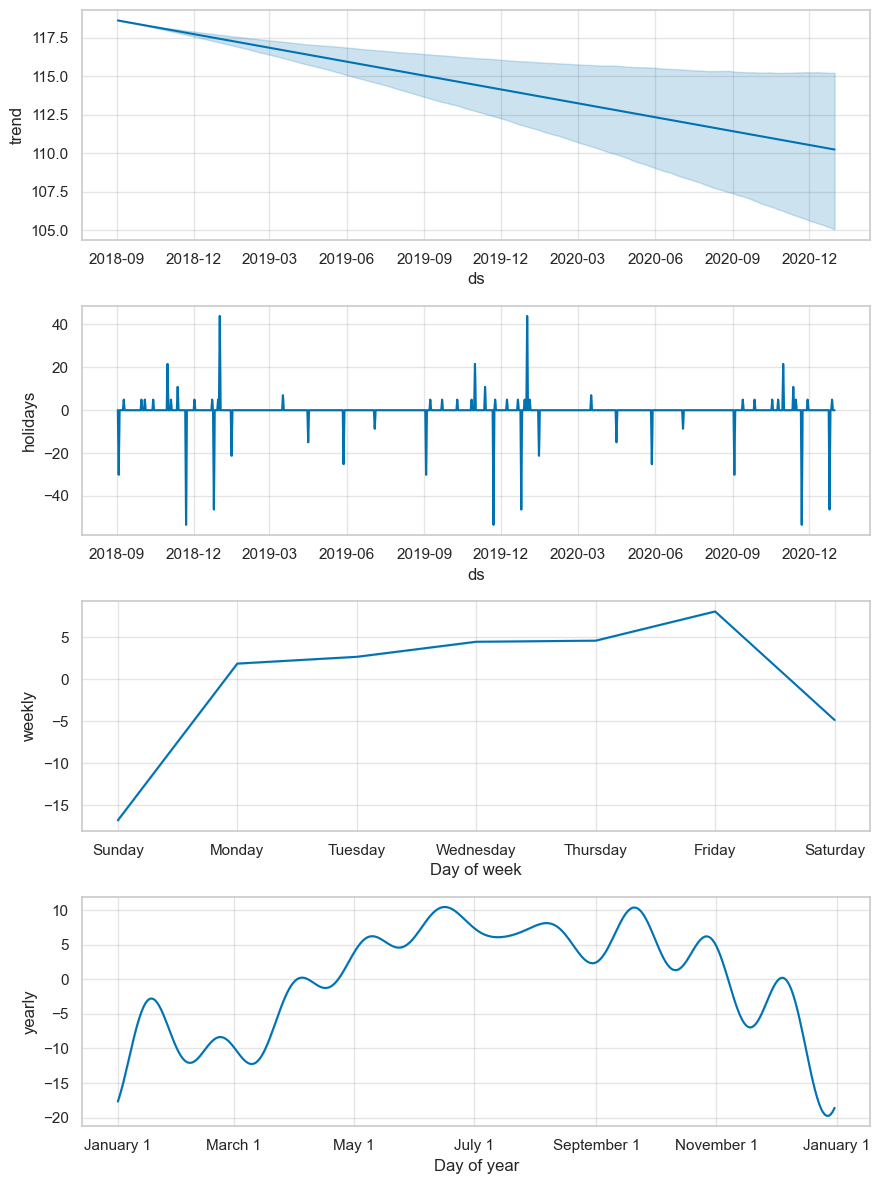

In [1299]:
grouped_df = complete_dfs.groupby('Date').size().reset_index(name='y')
future_dates = pd.date_range(start='2018-09-02', end='2020-12-31', freq='D')
future = pd.DataFrame({'ds': future_dates})
processed_df = grouped_df.copy()
processed_df = processed_df.rename(columns={'Date': 'ds'})
m = Prophet(holidays=holidays)
m.fit(processed_df)  
forecast = m.predict(future)
fig = m.plot_components(forecast)
print(event)

Based on the analysis conducted using the 'Prophet' model, our predictions indicate an anticipated decrease in crime during Christmas and Thanksgiving over the next two years, whereas New Year's Eve, Halloween, and St. Patrick's Day are expected to witness an uptick in criminal activities. We recommend bolstering police force presence during the latter events. Additionally, it's noteworthy that New England Patriots' home games do not appear to have a significant effect on local crime rates. This observation is likely due to the Patriots playing their games in Foxborough, MA, rather than in Boston, MA

Notably, crime tends to increase throughout the workweek and decrease over the weekend, possibly correlated with higher police officer presence on weekdays. Considering a significant swing of 25 crimes per day from January to July, we propose allocating more of the police budget for the summer months and longer days when crime rates tend to be higher. 

In [1300]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.353
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.253
Time:                        15:12:58   Log-Likelihood:                -118.82
No. Observations:                  34   AIC:                             241.6
Df Residuals:                      32   BIC:                             244.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4811     14.424      0.311      0.7

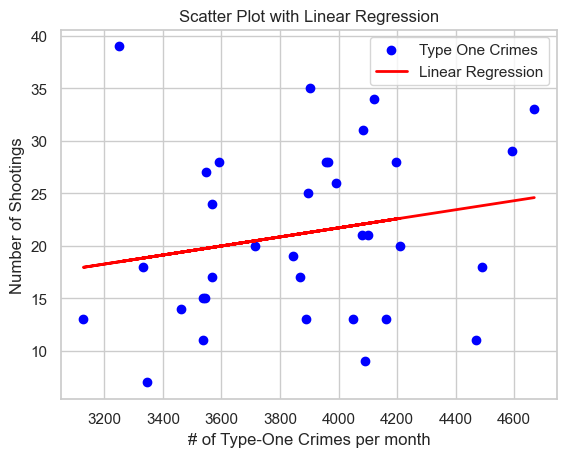

R^2 Value: 0.040555523986844366


In [1301]:
complete_dfs['Date'] = pd.to_datetime(complete_dfs['Date'])
complete_dfs['Month'] = complete_dfs['Date'].dt.month
complete_dfs['Year'] = complete_dfs['Date'].dt.year
shooting_data = complete_dfs[complete_dfs['UCR_PART'] == 'Part One']
shooting_data = complete_dfs[complete_dfs['SHOOTING'] == 'Y'].groupby(['Year', 'Month']).size().reset_index(name='SHOOTING_COUNT')
grouped_data = complete_dfs.groupby(['Year', 'Month']).agg({'UCR_PART': 'count', 'Avg Temp': 'mean', 'Precip': 'mean'}).reset_index()
merged_data = pd.merge(grouped_data, shooting_data, on=['Year', 'Month'], how='left').dropna()
z_scores = ((merged_data[['UCR_PART', 'Avg Temp', 'Precip']] - merged_data[['UCR_PART', 'Avg Temp', 'Precip']].mean()) / merged_data[['UCR_PART', 'Avg Temp', 'Precip']].std()).abs()
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
merged_data_no_outliers = merged_data[~outliers]
scaler = StandardScaler()
X = merged_data_no_outliers[['UCR_PART']]
Y = merged_data_no_outliers['SHOOTING_COUNT'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
r_squared = r2_score(Y, Y_pred)
X_with_intercept = sm.add_constant(X) 
model_ols = sm.OLS(Y, X_with_intercept).fit()
print(model_ols.summary())
plt.scatter(X['UCR_PART'], Y, color='blue', label='Type One Crimes')
plt.plot(X['UCR_PART'], Y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('# of Type-One Crimes per month')
plt.ylabel('Number of Shootings')
plt.legend()
plt.show()

print(f'R^2 Value: {r_squared}')

When examining the Rate of Crime per month in relation to the Number of Shootings, our analysis yields a non-significant p-value of 0.253, indicating a failure to reject the null hypothesis that the Number of Serious Crimes is not significantly linked to the number of shootings. This observation is corroborated by a low R^2 value of 0.040, suggesting a weak linear correlation between the variables. Additionally, we explored the inclusion of Average Daily Temperature and Average Daily Precipitation in the model; however, these variables proved to be less significant.

In [1304]:
from geopy.distance import great_circle
import math
def calculate_distance(point1, point2):
    if any(math.isnan(coord) for coord in point1 + point2):
        return float('inf')
    return great_circle(point1, point2).miles

In [1303]:
shootings = complete_dfs[complete_dfs['SHOOTING'] == 'Y']
boston_booze[['Latitude', 'Longitude']] = boston_booze[['Longitude', 'Latitude']]
shooting_dba_distances = []
for shooting_index, shooting_row in shootings.iterrows():
    shooting_location = (float(shooting_row['Lat']), float(shooting_row['Long']))
    valid_alcohol_sales = boston_booze.dropna(subset=['Latitude', 'Longitude'])
    valid_alcohol_sales['Latitude'] = pd.to_numeric(valid_alcohol_sales['Latitude'], errors='coerce')
    valid_alcohol_sales['Longitude'] = pd.to_numeric(valid_alcohol_sales['Longitude'], errors='coerce')
    if not valid_alcohol_sales.empty:
        nearest_alcohol_sale = min(valid_alcohol_sales.iterrows(), key=lambda x: calculate_distance(shooting_location, (x[1]['Latitude'], x[1]['Longitude'])))
        distance = calculate_distance(shooting_location, (nearest_alcohol_sale[1]['Latitude'], nearest_alcohol_sale[1]['Longitude']))
        shooting_dba_distances.append((nearest_alcohol_sale[1]['dba_name'], distance))
shooting_dba_distances_df = pd.DataFrame(shooting_dba_distances, columns=['dba_name', 'distance'])
most_shootings_dba = shooting_dba_distances_df.groupby('dba_name').size().idxmax()



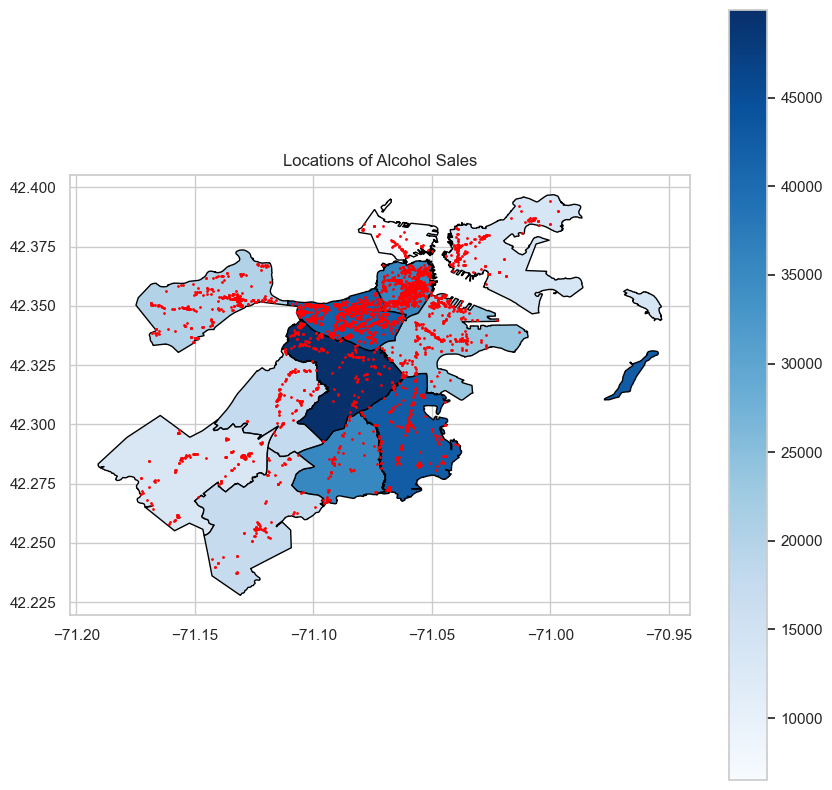

In [1305]:
from shapely.geometry import Point
boston_booze['Latitude'].replace(0, np.nan, inplace=True)
boston_booze['Longitude'].replace(0, np.nan, inplace=True)
b_b = boston_booze.dropna(subset=['Longitude', 'Latitude'])
b_b = b_b[(b_b['Longitude'] != 0) & (b_b['Latitude'] != 0)]
ax = districts_gdf.plot(column = districts_gdf.CRIMES, cmap = 'Blues', legend = True, edgecolor = 'black',figsize=(10,10))
geometry = [Point(lon, lat) for lon,lat in zip(b_b['Longitude'],b_b['Latitude'])]
boston_booze_gdf = gpd.GeoDataFrame(b_b,geometry=geometry)
boston_booze_gdf.crs = "EPSG:2249"
boston_booze_gdf.plot(ax=ax, color ='red',markersize = 1)
plt.title('Locations of Alcohol Sales')
plt.show()

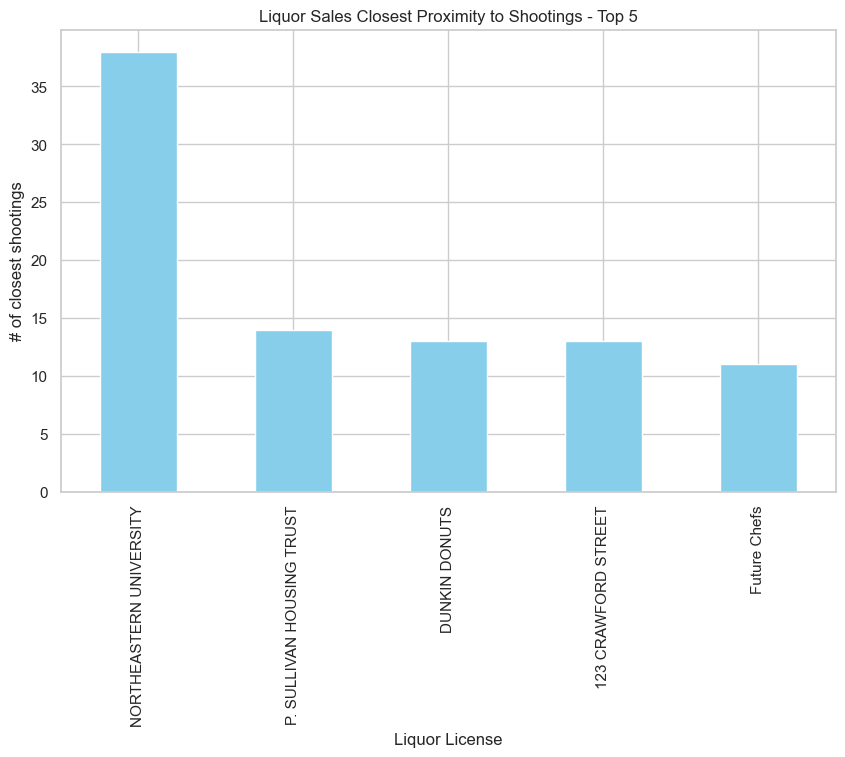

In [1306]:
top_dba_names = shooting_dba_distances_df.groupby('dba_name').size().nlargest(5).index
top_dba_distances_df = shooting_dba_distances_df[shooting_dba_distances_df['dba_name'].isin(top_dba_names)]
plt.figure(figsize=(10, 6))
top_dba_counts = top_dba_distances_df['dba_name'].value_counts()
top_dba_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Liquor License')
plt.ylabel('# of closest shootings')
plt.title('Liquor Sales Closest Proximity to Shootings - Top 5')
plt.show()

In the analysis of shootings in proximity to Liquor Licenses, Northeastern University stands out with more than double the number of licenses compared to the next highest establishment. This suggests a need for a robust police presence in this vicinity. Further research is essential to ascertain whether specific campus events, such as sporting events or concerts, are the primary contributors to this discrepancy.

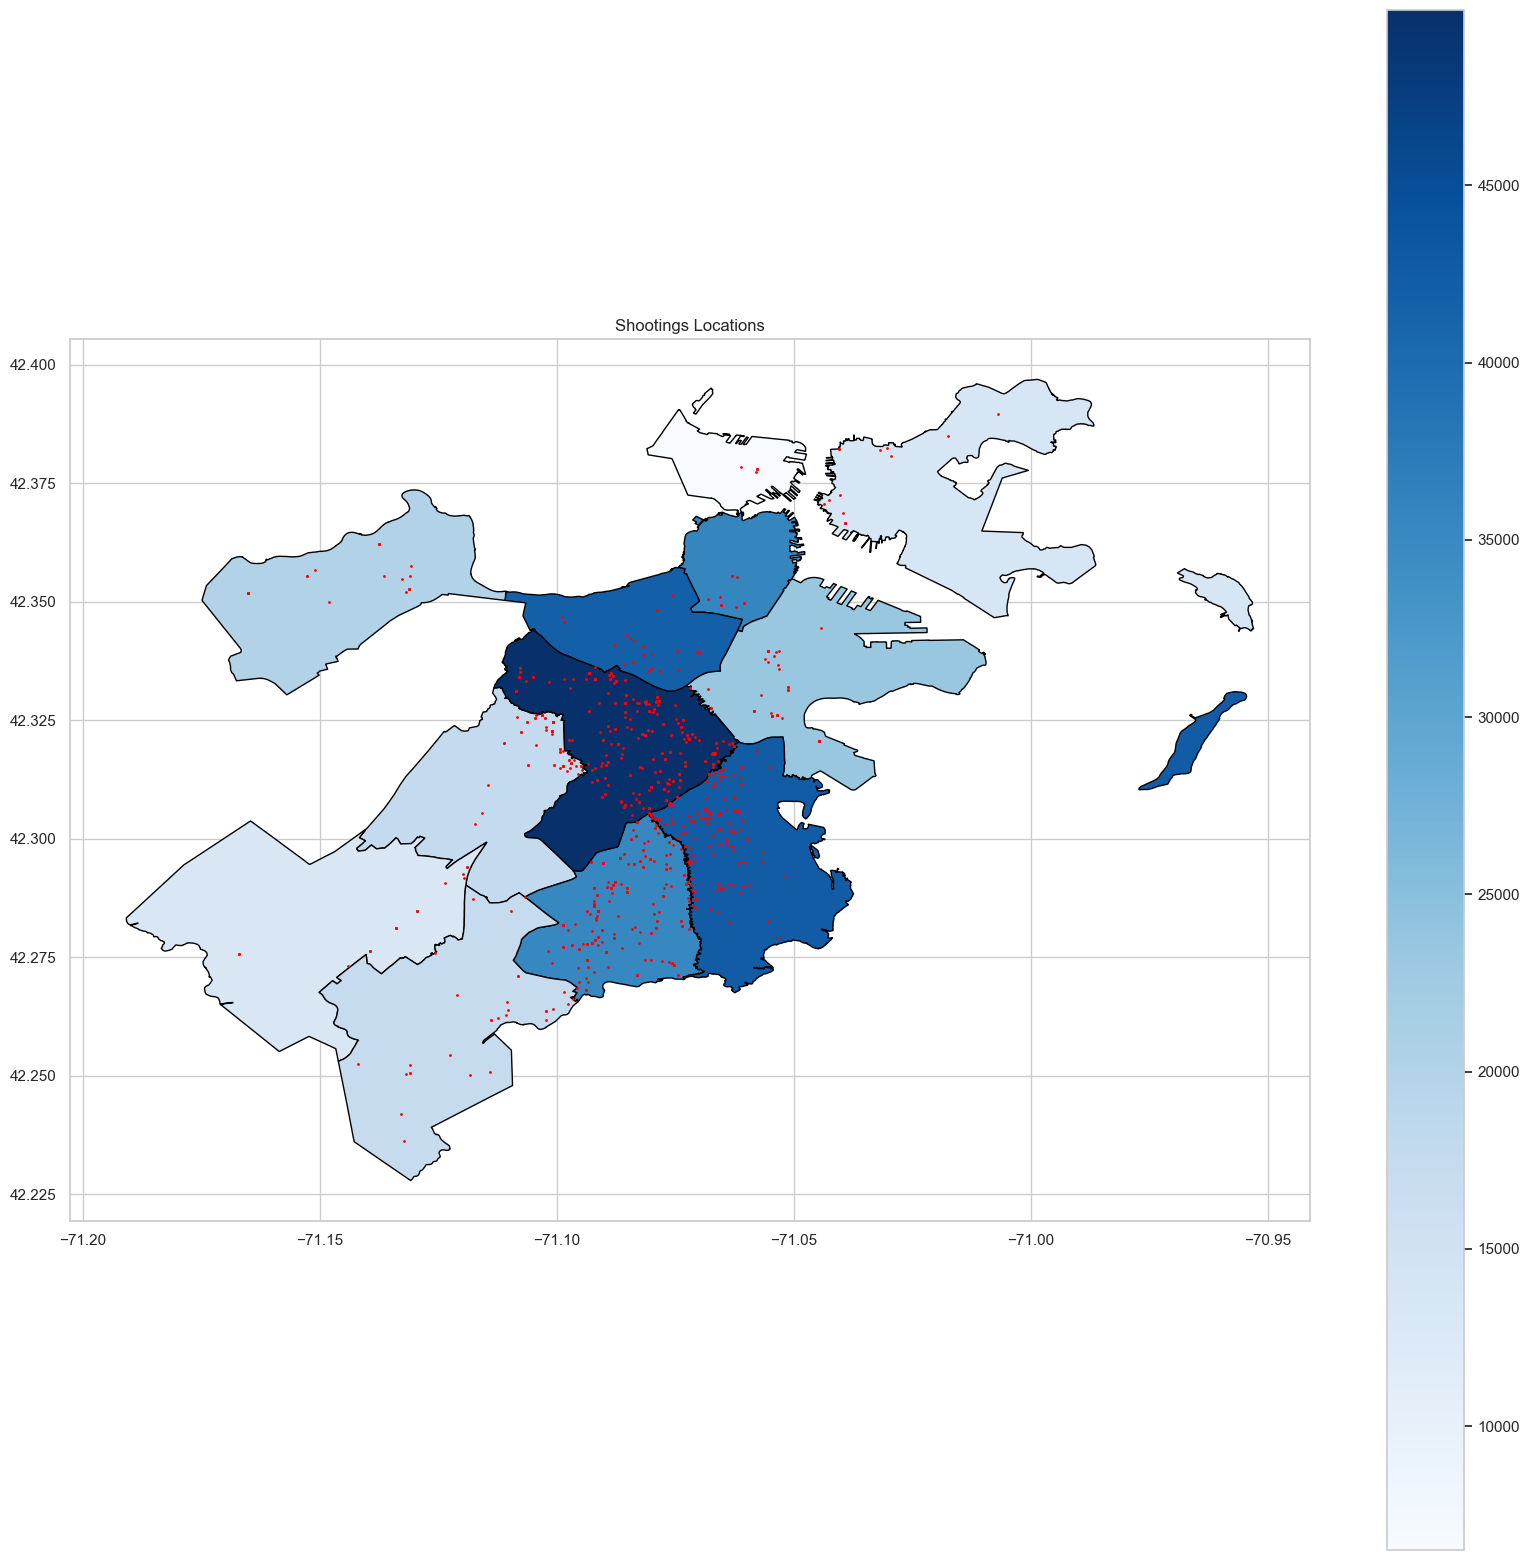

In [1307]:
shootings = crime_set.loc[crime_set['SHOOTING'] == 'Y']
from shapely.geometry import Point
shootings = shootings.dropna(subset=['Long', 'Lat'])
ax = districts_gdf.plot(column = districts_gdf.CRIMES, cmap = 'Blues', legend = True, edgecolor = 'black',figsize=(20,20))
geometry = [Point(lon, lat) for lon,lat in zip(shootings['Long'],shootings['Lat'])]
shootings_gdf = gpd.GeoDataFrame(shootings,geometry=geometry)
shootings_gdf.crs = "EPSG:2249"
shootings_gdf.plot(ax=ax, color ='red',markersize = 1)
plt.title('Shootings Locations')
plt.show()

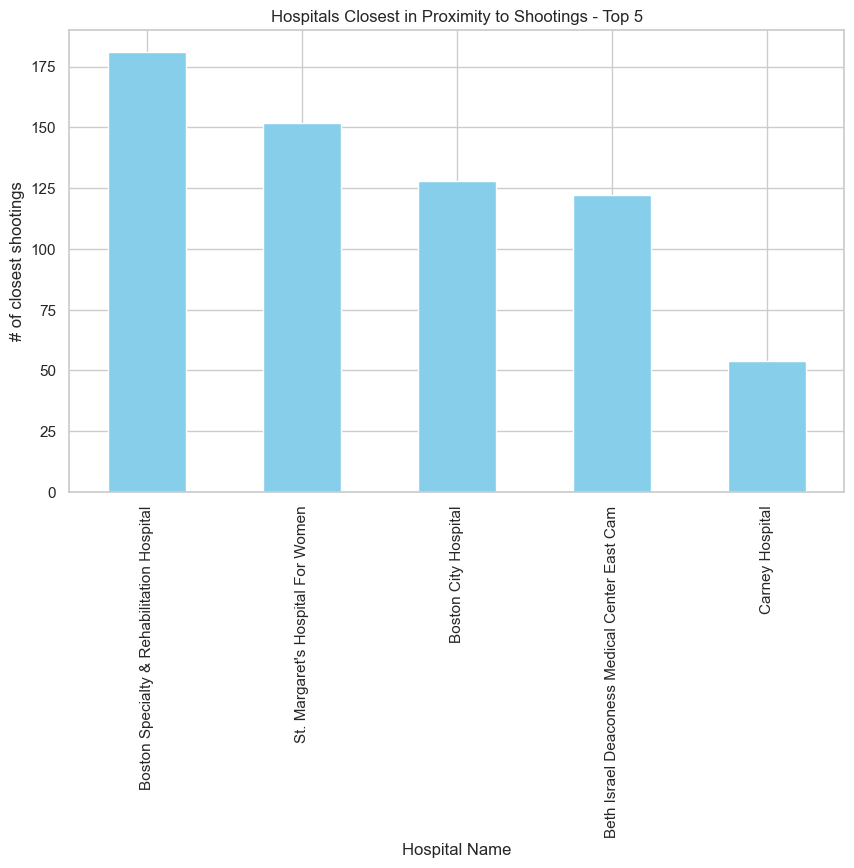

In [1310]:
shootings = complete_dfs[complete_dfs['SHOOTING'] == 'Y']
b_hospitals[['Lat', 'Long']] = b_hospitals[['Long', 'Lat']]
shooting_hospital_distances = []

for shooting_index, shooting_row in shootings.iterrows():
    shooting_location = (float(shooting_row['Long']), float(shooting_row['Lat']))
    valid_hospitals = b_hospitals.dropna(subset=['Lat', 'Long'])
    valid_hospitals['Lat'] = pd.to_numeric(valid_hospitals['Lat'], errors='coerce')
    valid_hospitals['Long'] = pd.to_numeric(valid_hospitals['Long'], errors='coerce')
    
    if not valid_hospitals.empty:
        nearest_hospital = min(valid_hospitals.iterrows(), key=lambda x: calculate_distance(shooting_location, (x[1]['Lat'], x[1]['Long'])))
        distance = calculate_distance(shooting_location, (nearest_hospital[1]['Long'], nearest_hospital[1]['Lat']))
        shooting_hospital_distances.append((nearest_hospital[1]['NAME'], distance))

shooting_hospital_distances_df = pd.DataFrame(shooting_hospital_distances, columns=['NAME', 'distance'])
most_shootings_hospital = shooting_hospital_distances_df.groupby('NAME').size().idxmax()
top_hospital_names = shooting_hospital_distances_df.groupby('NAME').size().nlargest(5).index

top_hospital_distances_df = shooting_hospital_distances_df[shooting_hospital_distances_df['NAME'].isin(top_hospital_names)]

plt.figure(figsize=(10, 6))
top_hospital_counts = top_hospital_distances_df['NAME'].value_counts()
top_hospital_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hospital Name')
plt.ylabel('# of closest shootings')
plt.title('Hospitals Closest in Proximity to Shootings - Top 5')
plt.show()

In analyzing the proximity of hospitals to shooting incidents, it becomes evident that two out of the five closest facilities, Carney Hospital and St. Margaret's Hospital For Women, are located in Dorchester. Additionally, another hospital, Boston Specialty & Rehabilitation Hospital, is situated on the boundary in Mattapan. This underscores the critical importance of having a strong police presence in Dorchester, extending beyond the mere frequency of shootings. Notably, it also addresses the significant geographical distance to emergency care. Furthermore, it is reasonable to presume that the latter two mentioned hospitals may lack adequately equipped Intensive Care Units (ICUs) to handle multiple shooting events effectively.

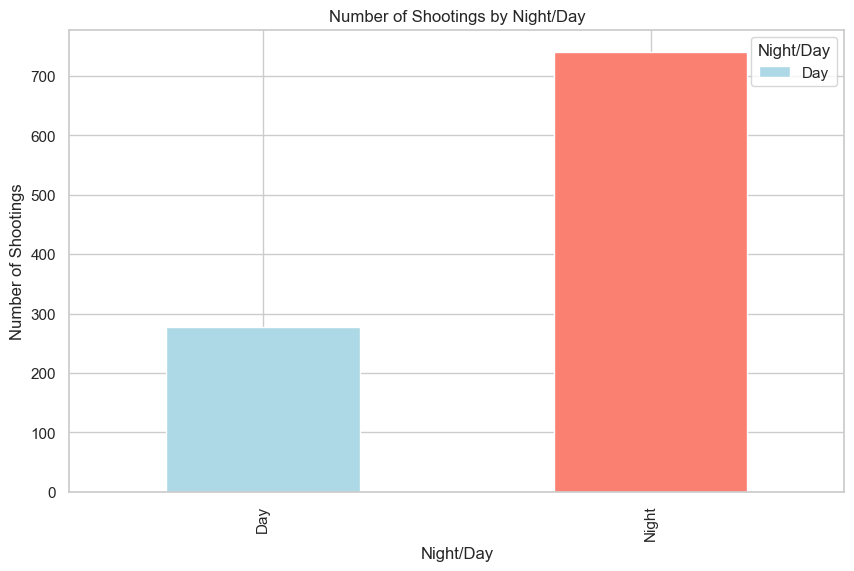

In [1317]:
from astral.sun import sun
from astral import LocationInfo
from dateutil import tz
crime_set['is_night'] = crime_set['is_night'].replace({False: 'Day', True: 'Night'})
shooting_data = crime_set[crime_set['SHOOTING'] == 'Y']
grouped_data = shooting_data.groupby('is_night').size()
ax = grouped_data.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 6))
plt.xlabel('Night/Day')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings by Night/Day')
plt.legend(title='Night/Day', labels=['Day', 'Night'])
plt.show()

There is a notable correlation between shootings and the evening hours, as evidenced by twice the number of incidents occurring after sunset compared to those before.

In [1312]:
shootingst1 = shooting_data[shooting_data['is_night'] == 'Night']
print(shootingst1)

       INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP  \
1295        I182069509           413    Aggravated Assault   
1860        I182068876           413    Aggravated Assault   
4107        I182066420           413    Aggravated Assault   
4108        I182066420          3114  Investigate Property   
5162        I182065260          1501    Firearm Violations   
...                ...           ...                   ...   
315528      I152053302           413    Aggravated Assault   
316108      I152052674           413    Aggravated Assault   
316374      I152052391           413    Aggravated Assault   
317567      I152050961           413    Aggravated Assault   
318306      I152050036           413    Aggravated Assault   

                                  OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
1295                   ASSAULT - AGGRAVATED - BATTERY      E18            540   
1860                   ASSAULT - AGGRAVATED - BATTERY       B2            183   
4107        

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

shootingst1['d_streetlight'] = 0  # Initialize the new column

for shooting_index, shooting_row in shootingst1.iterrows():
    shooting_location = (float(shooting_row['Lat']), float(shooting_row['Long']))
    
    valid_street_lights = street_lights.dropna(subset=['Lat', 'Long'])
    valid_street_lights['Lat'] = pd.to_numeric(valid_street_lights['Lat'], errors='coerce')
    valid_street_lights['Long'] = pd.to_numeric(valid_street_lights['Long'], errors='coerce')
    
    if not valid_street_lights.empty:
        nearest_street_light = min(valid_street_lights.iterrows(), key=lambda x: haversine(shooting_location[1], shooting_location[0], x[1]['Lat'], x[1]['Long']))
        distance = haversine(shooting_location[0], shooting_location[1], nearest_street_light[1]['Lat'], nearest_street_light[1]['Long'])
        # Update the 'd_streetlight' column in complete_dfs
        shootingst1.at[shooting_index, 'd_streetlight'] = distance

In [1315]:
print(shooting_location)

(42.35283155, -71.13114273)


In [ ]:
shootingst1['d_streetlight_gt_14'] = shootingst1['d_streetlight'] >= 14

In [ ]:
plt.figure(figsize=(8, 6))
shootings1['d_streetlight_gt_14'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.xlabel('Within a Street-lights illumination (width of 14 meters)')
plt.ylabel('Count')
plt.title('Comparison of Shooting Incidents based on Street Light Proximity')
plt.show()

In [429]:
from sklearn.metrics import silhouette_score

C:\Users\camde\AppData\Local\Temp\ipykernel_17120\2869010278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poc_1['Lat'].replace(-1, np.nan, inplace=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\2869010278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poc_1['Long'].replace(-1, np.nan, inplace=True)
C:\Users\camde\AppData\Local\Temp\ipykernel_17120\2869010278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poc_1

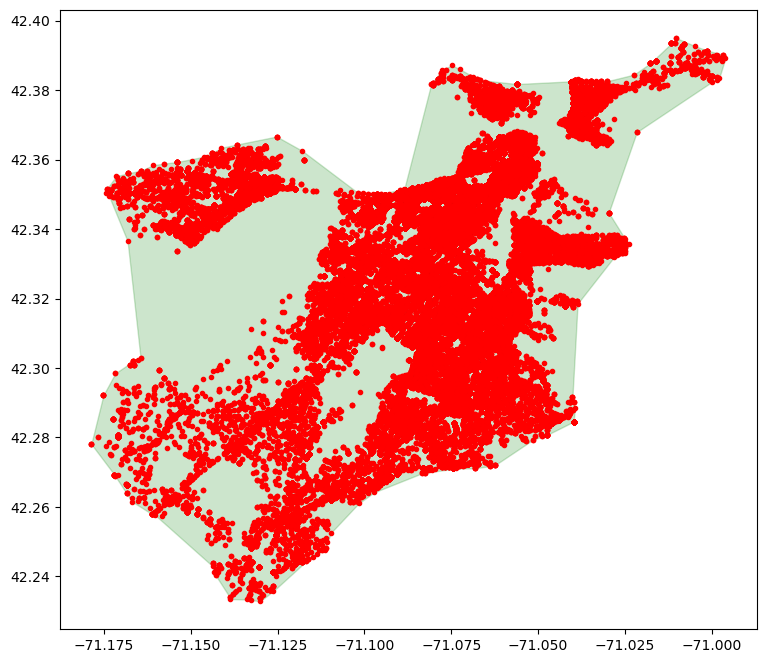

In [384]:
import libpysal
poc_1 = crime_set.loc[crime_set['UCR_PART'] == 'Part One']
poc_1['Lat'].replace(-1, np.nan, inplace=True)
poc_1['Long'].replace(-1, np.nan, inplace=True)
poc_1['Lat'].fillna('NaN',inplace=True)
poc_1['Long'].fillna('NaN',inplace=True)
poc_1['Lat'] = pd.to_numeric(poc_1['Lat'], errors='coerce')
poc_1['Long'] = pd.to_numeric(poc_1['Long'], errors='coerce')
poc_1.dropna(subset=['Lat', 'Long'], inplace=True)
coordinates = poc_1[['Long','Lat']]
convex_hull_vertices = centrography.hull(coordinates)
coordinates.reset_index(drop=True, inplace=True)
coordinates_array = coordinates.values
alpha_shape,alpha,circs = libpysal.cg.alpha_shape_auto(coordinates_array,return_circles=True)
f,ax=plt.subplots(1,1,figsize=(9,9))
gpd.GeoSeries([alpha_shape]).plot(ax=ax,edgecolor="green",facecolor="green",alpha=0.2,label="Tighest single alpha shape")
ax.scatter(coordinates_array[:, 0], coordinates_array[:, 1], color="red", marker=".", label="Source Points")
plt.show()

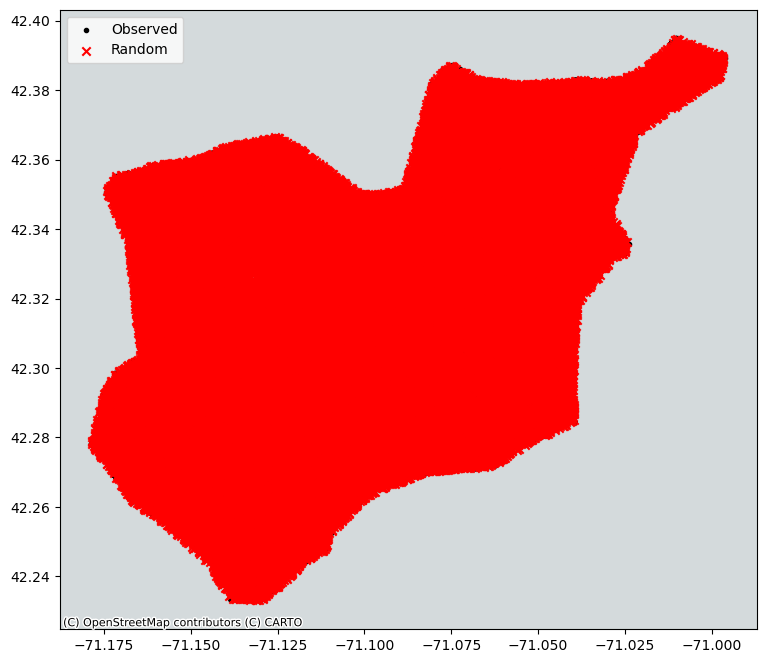

QStatistic p-value (observed pattern): 0.0
QStatistic p-value (random pattern with shape of shapefile): 0.0


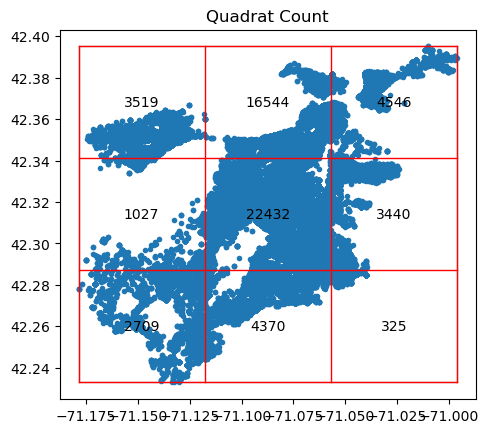

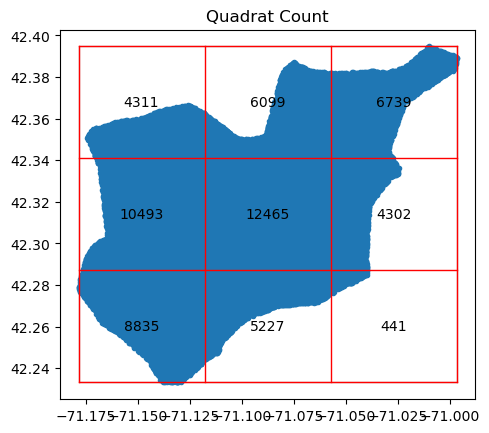

In [402]:
from pointpats import (
distance_statistics, 
QStatistic,
random,
PointPattern)
poc_1 = complete_dfs.copy()
poc_1 = poc_1.loc[poc_1['UCR_PART'] == 'Part One']
poc_1['Lat'].replace(-1, np.nan, inplace=True)
poc_1['Long'].replace(-1, np.nan, inplace=True)
poc_1['Lat'].fillna('NaN',inplace=True)
poc_1['Long'].fillna('NaN',inplace=True)
poc_1['Lat'] = pd.to_numeric(poc_1['Lat'], errors='coerce')
poc_1['Long'] = pd.to_numeric(poc_1['Long'], errors='coerce')
poc_1.dropna(subset=['Lat', 'Long'], inplace=True)
coordinates = poc_1[['Lat','Long']]
random_pattern_shapefile = random.poisson(alpha_shape, size=len(coordinates))
f,ax = plt.subplots(1,figsize=(9,9))
plt.scatter(coordinates['Long'], coordinates['Lat'], color="black", marker=".", label="Observed")
plt.scatter(random_pattern_shapefile[:, 0], random_pattern_shapefile[:, 1], color="red", marker="x", label="Random")
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron, zoom=15)
plt.legend()
plt.show()
point_pattern = PointPattern(coordinates[['Long', 'Lat']])
point_pattern_shapefile = PointPattern(random_pattern_shapefile)
qstat = QStatistic(point_pattern)
qstat_null = QStatistic(point_pattern_shapefile)
qstat.plot()
print("QStatistic p-value (observed pattern):", qstat.chi2_pvalue)
qstat_null.plot()
print("QStatistic p-value (random pattern with shape of shapefile):", qstat_null.chi2_pvalue)

In [46]:
g_test = distance_statistics.g_test(coordinates,support=40,keep_simulations=True)

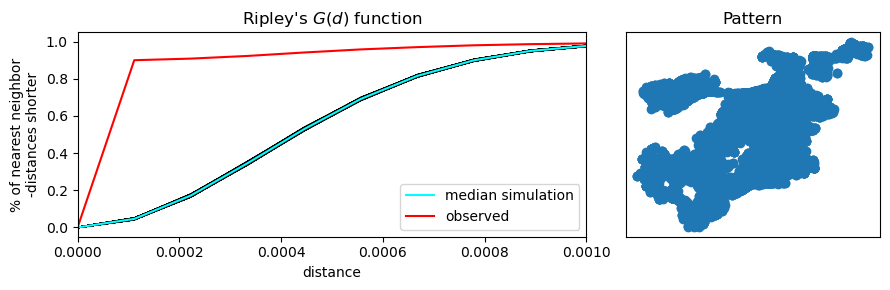

In [55]:
f, ax = plt.subplots(1,2,figsize=(9,3), gridspec_kw = dict(width_ratios=(6,3)))
ax[0].plot(g_test.support, g_test.simulations.T,color="k",alpha=0.01)
ax[0].plot(g_test.support,np.median(g_test.simulations,axis=0),color="cyan",label="median simulation")
ax[0].plot(g_test.support,g_test.statistic,label="observed",color="red")
ax[0].set_xlabel("distance")
ax[0].set_ylabel("% of nearest neighbor\n-distances shorter")
ax[0].legend()
ax[0].set_xlim(0,0.001)
ax[0].set_title(r"Ripley's $G(d)$ function")
ax[1].scatter(coordinates['Long'], coordinates['Lat'])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title("Pattern")
f.tight_layout()
plt.show()

In [93]:
coordinates_np = coordinates.to_numpy()
print(coordinates_np)
f_test = distance_statistics.f_test(coordinates_np, support=40, keep_simulations=True)

[[ 42.28536992 -71.17244016]
 [ 42.25768764 -71.1264177 ]
 [ 42.33836272 -71.15441001]
 ...
 [ 42.35742837 -71.05832551]
 [ 42.30703835 -71.06615319]
 [ 42.33695098 -71.08574813]]


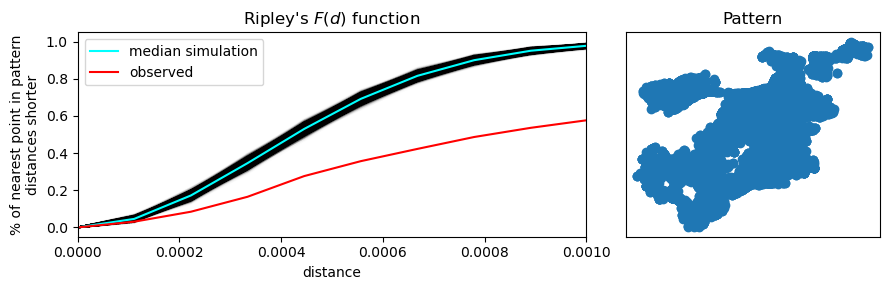

In [98]:
f, ax = plt.subplots(1, 2, figsize=(9, 3), gridspec_kw=dict(width_ratios=(6, 3)))
ax[0].plot(f_test.support, f_test.simulations.T, color="k", alpha=0.01)
ax[0].plot(f_test.support,np.median(f_test.simulations, axis=0),color="cyan",label="median simulation",)
ax[0].plot(f_test.support, f_test.statistic, label="observed", color="red")
ax[0].set_xlabel("distance")
ax[0].set_ylabel("% of nearest point in pattern\ndistances shorter")
ax[0].legend()
ax[0].set_xlim(0, 0.001)
ax[0].set_title(r"Ripley's $F(d)$ function")
ax[1].scatter(coordinates['Long'], coordinates['Lat'])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title("Pattern")
f.tight_layout()
plt.show()

In [1247]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
import warnings
warnings.filterwarnings('ignore')